In [1]:
import pandas as pd
import seaborn as sns
import datetime
import warnings
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf


In [2]:
df = pd.read_csv('crude_rate.csv')


In [3]:
df = df.replace('Suppressed', 0)

In [4]:
# convert the obj to numeric
df['Deaths'] = pd.to_numeric(df['Deaths'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
State                                                              816 non-null object
Year                                                               816 non-null int64
Deaths                                                             816 non-null int64
Population                                                         816 non-null int64
Crude Rate                                                         816 non-null object
Crude Rate Lower 95% Confidence Interval                           816 non-null object
Crude Rate Upper 95% Confidence Interval                           816 non-null object
Prescriptions Dispensed by US Retailers in that year (millions)    816 non-null int64
dtypes: int64(4), object(4)
memory usage: 51.1+ KB


In [6]:
# Functions
# def subseting (df ,state):
#     df_copy = df.copy()
#     df_copy= df[df.State == state]
#     df_copy = pd.to_numeric(df['Deaths'])
#     df_copy = df[[ 'Year' , 'Deaths']]
#     return df_copy

def convert_to_dt(row):
    dt = datetime.datetime(row.Year, 1, 1)
    return dt

def convert_to_dt1(df):
    df_copy = df.copy()
    df_copy.Year = df_copy.apply(convert_to_dt , axis =1)
    return df_copy

In [7]:
def subseting (df ,state):
    df_copy = df.copy()
    df = df[df.State == state]
    df_copy = df[[ 'Year' , 'Deaths']]
    df = pd.to_numeric(df['Deaths'])
    return df_copy

In [8]:
list_of_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

## Subseting df by State

In [9]:
df_Alabama = subseting(df , list_of_states[0])

In [10]:
df_Alaska = subseting(df, list_of_states[1])

In [11]:
df_Arizona = subseting(df , list_of_states[2])

In [12]:
df_Arkansas = subseting(df , list_of_states[3])

In [13]:
df_California = subseting (df , list_of_states[4])

In [14]:
df_Colorado = subseting(df , list_of_states[5])

In [15]:
df_Connecticut = subseting (df , list_of_states[6])

In [16]:
df_Delaware = subseting(df , list_of_states[7])

In [17]:
df_DSC = subseting(df , list_of_states[8])

In [18]:
df_DSC

Year  Deaths
128  1999      28
129  2000      43
130  2001      48
131  2002      29
132  2003      60
133  2004      53
134  2005      45
135  2006      62
136  2007      29
137  2008      33
138  2009      13
139  2010      36
140  2011      57
141  2012      45
142  2013      60
143  2014      65

In [19]:
df_Florida = subseting(df ,list_of_states[9])

In [20]:
df_Georgia = subseting(df , list_of_states[10])

In [21]:
df_Hawaii = subseting(df , list_of_states[11])

In [22]:
df_Idaho = subseting(df , list_of_states[12])

In [23]:
df_Illinois = subseting (df , list_of_states[13])

In [24]:
df_Indiana = subseting(df , list_of_states[14])

In [25]:
df_Iowa = subseting(df , list_of_states[15])

In [26]:
df_Kansas = subseting(df , list_of_states[16])

In [27]:
df_Kentucky = subseting(df , list_of_states[17])

In [28]:
df_Louisiana = subseting(df , list_of_states[18])

In [29]:
df_Maine = subseting(df , list_of_states[19])

In [30]:
df_Maryland = subseting(df , list_of_states[20])

In [31]:
df_Massachusetts = subseting(df , list_of_states[21])

In [32]:
df_Michigan = subseting(df , list_of_states[22])

In [33]:
df_Minnesota = subseting(df , list_of_states[23])

In [34]:
df_Mississippi = subseting(df , list_of_states[24])

In [35]:
df_Missouri = subseting(df , list_of_states[25])

In [36]:
df_Montana = subseting(df , list_of_states[26])

In [37]:
df_Nebraska = subseting(df , list_of_states[27])

In [38]:
df_Nevada = subseting(df , list_of_states [28])

In [39]:
df_New_Hampshire = subseting(df , list_of_states [29])

In [40]:
df_New_Jersey = subseting(df , list_of_states [30])

In [41]:
df_New_Mexico = subseting(df , list_of_states [31])

In [42]:
df_NY = subseting(df , list_of_states [32])

In [43]:
df_North_Carolina = subseting(df , list_of_states [33])

In [44]:
df_North_Dakota = subseting(df , list_of_states [34])

In [45]:
df_Ohio = subseting(df , list_of_states [35])

In [46]:
df_Oklahoma = subseting(df , list_of_states [36])

In [47]:
df_Oregon = subseting(df , list_of_states [37])

In [48]:
df_Pennsylvania = subseting(df , list_of_states [38])

In [49]:
df_Rhode_Island = subseting(df , list_of_states [39])

In [50]:
df_South_Carolina = subseting(df , list_of_states [40])

In [51]:
df_South_Dakota = subseting(df , list_of_states [41])

In [52]:
df_Tennessee = subseting(df , list_of_states [42])

In [53]:
df_Texas = subseting(df , list_of_states [43])

In [54]:
df_Utah = subseting(df , list_of_states [44])

In [55]:
df_Vermot = subseting(df , list_of_states [45])

In [56]:
df_Virginia = subseting(df , list_of_states [46])

In [57]:
df_Washington = subseting(df , list_of_states [47])

In [58]:
df_West_Virginia = subseting(df , list_of_states [48])

In [59]:
df_Wisconsin = subseting(df , list_of_states [49])

In [60]:
df_Wyoming = subseting(df , list_of_states [50])

## Converting Year in datetime obj

In [61]:
df_Alabama = convert_to_dt1(df_Alabama)

In [62]:
df_Arizona = convert_to_dt1(df_Arizona)

In [63]:
df_Arkansas = convert_to_dt1(df_Arkansas)

In [64]:
df_California = convert_to_dt1(df_California)

In [65]:
df_Colorado = convert_to_dt1(df_Colorado)

In [66]:
df_Connecticut= convert_to_dt1(df_Connecticut)

In [67]:
df_Delaware = convert_to_dt1(df_Delaware)

In [68]:
df_DSC = convert_to_dt1(df_DSC)

In [69]:
df_Florida = convert_to_dt1(df_Florida)

In [70]:
df_Georgia = convert_to_dt1(df_Georgia)

In [71]:
df_Hawaii = convert_to_dt1(df_Hawaii)

In [72]:
df_Idaho = convert_to_dt1(df_Idaho)

In [73]:
df_Illinois = convert_to_dt1(df_Illinois)

In [74]:
df_Indiana = convert_to_dt1(df_Indiana)

In [75]:
df_Iowa = convert_to_dt1(df_Iowa)

In [76]:
df_Kansas = convert_to_dt1(df_Kansas)

In [77]:
df_Kentucky = convert_to_dt1(df_Kentucky)

In [78]:
df_Louisiana = convert_to_dt1(df_Louisiana)


In [79]:
df_Maine = convert_to_dt1(df_Maine)


In [80]:
df_Maryland = convert_to_dt1(df_Maryland)

In [81]:
df_Massachusetts = convert_to_dt1(df_Massachusetts)

In [82]:
df_Michigan = convert_to_dt1(df_Michigan)

In [83]:
df_Minnesota = convert_to_dt1(df_Minnesota)

In [84]:
df_Mississippi = convert_to_dt1(df_Mississippi)

In [85]:
df_Missouri = convert_to_dt1(df_Missouri)

In [86]:
df_Montana = convert_to_dt1(df_Montana)

In [87]:
df_Nebraska = convert_to_dt1(df_Nebraska)

In [88]:
df_Nevada = convert_to_dt1(df_Nevada)

In [89]:
df_New_Hampshire = convert_to_dt1(df_New_Hampshire)

In [90]:
df_New_Jersey = convert_to_dt1(df_New_Jersey)

In [91]:
df_New_Mexico = convert_to_dt1(df_New_Mexico)

In [92]:
df_North_Carolina = convert_to_dt1(df_North_Carolina)

In [93]:
df_North_Dakota = convert_to_dt1(df_North_Dakota)

In [94]:
df_NY  = convert_to_dt1(df_NY)

In [95]:
df_Ohio = convert_to_dt1(df_Ohio)

In [96]:
df_Oklahoma = convert_to_dt1(df_Oklahoma)

In [97]:
df_Oregon = convert_to_dt1(df_Oregon)

In [98]:
df_Pennsylvania = convert_to_dt1(df_Pennsylvania)

In [99]:
df_Rhode_Island = convert_to_dt1(df_Rhode_Island)

In [100]:
df_South_Carolina = convert_to_dt1(df_South_Carolina)

In [101]:
df_South_Dakota = convert_to_dt1(df_South_Dakota)

In [102]:
df_Tennessee = convert_to_dt1(df_Tennessee)

In [103]:
df_Texas = convert_to_dt1(df_Texas)

In [104]:
df_Utah = convert_to_dt1(df_Utah)

In [105]:
df_Vermot = convert_to_dt1(df_Vermot)


In [106]:
df_Virginia = convert_to_dt1(df_Virginia)

In [107]:
df_Washington = convert_to_dt1(df_Washington)

In [108]:
df_West_Virginia = convert_to_dt1(df_West_Virginia)

In [109]:
df_Wisconsin = convert_to_dt1(df_Wisconsin)

In [110]:
df_Wyoming = convert_to_dt1(df_Wyoming)


In [111]:
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]

In [112]:
def indexing_column_year(list_):
    for i in list_:
        i.index = i['Year']

In [113]:
indexing_column_year(list_of_df)

In [114]:
# 'g' in df
'1999-01-01' in df_Ohio.index

True

## Plot to see Stationarity

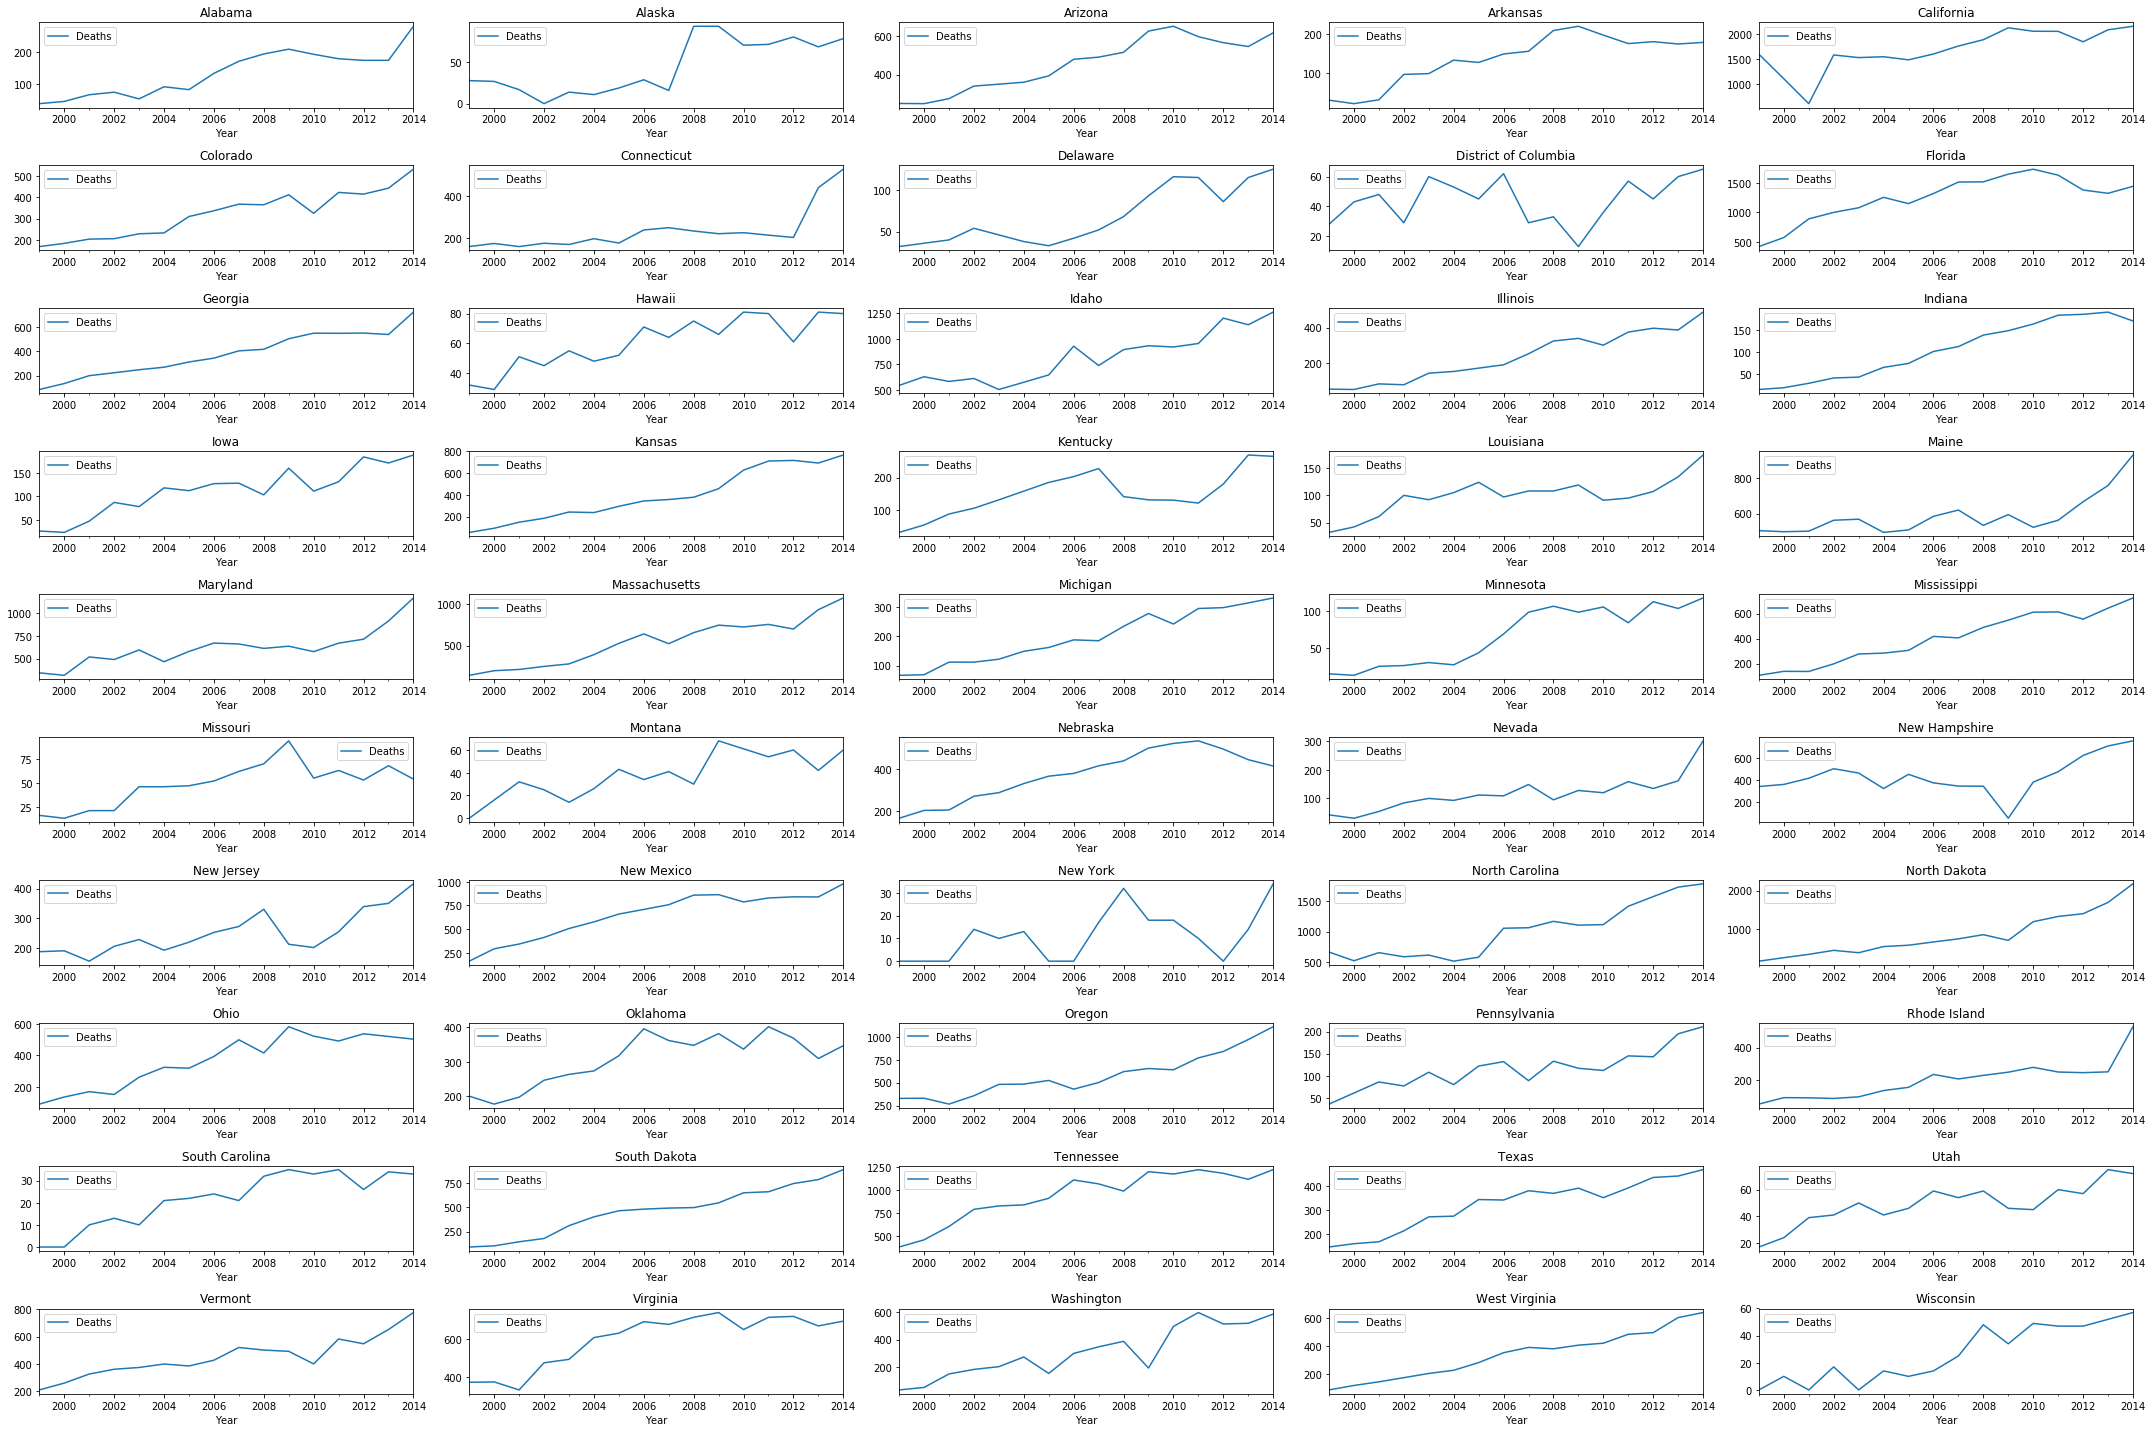

In [110]:
plt.figure(figsize=(30,20), facecolor='white')

# plot numbering starts at 1, not 0
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]
list_of_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']
plot_number = 1
for i , u in zip(list_of_df , list_of_states):
    ax = plt.subplot(10, 5, plot_number)
    i.plot(x='Year', y='Deaths', ax=ax  )
    ax.set_title(u)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
    plt.tight_layout()

## Transformation, Smoothing, and Differencing 


#### Based on Dickey-Fuller test, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the time series is stationary.

In [119]:
def dickey_fuller(list_of_dfs):
    for i in list_of_dfs:
        X = i["Deaths"].values
        result = adfuller(X)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [112]:
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]

In [120]:
dickey_fuller(list_of_df)

ADF Statistic: 0.249449
p-value: 0.974903
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.970722
p-value: 0.763792
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -1.189738
p-value: 0.677994
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.9

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.056149
p-value: 0.953635
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


In [115]:
def log_trans(list_dfs):
    for i in list_dfs:
        i["Deaths"] = np.log(i["Deaths"])
        i['Deaths'] = i['Deaths'].diff()

In [116]:
log_trans(list_of_df)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [117]:
def clean_na (df):
    df_copy = df.copy()
    df_copy["Deaths"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
    return df_copy

# def clean_na (df):
#     df_copy = df.copy()
#     df_copy["Deaths"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
#     return df_copy

# def clean_na55 (df):
#     df_copy = df.copy()
#     df_copy["Deaths"] = df["Deaths"].replace([np.inf, -np.inf], np.nan)
#     df_copy = df["Deaths"].dropna()
#     return df_copy

# def clean_88 (df):
#     df["Deaths"] = df["Deaths"].replace([np.inf, -np.inf], np.nan).dropna(inplace = True)
#     return df
    
# def clean_na33 (df):
#     df_copy = df.copy()
#     df_copy["Deaths_clean"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
#     return df_copy

# def clean_na2 (list_of_dfs):
#     dfs = []
#     for df in list_of_dfs: 
#         df = df["Deaths"].replace([np.inf, -np.inf], np.nan).dropna(inplace=True)
#         dfs.append(df)
#     return dfs


# def clean_na1(df):
#     df_copy = df.copy()
#     df_copy.Deaths = df_copy.mapapply(clean_na2 , axis =1)
#     return df_copy

In [118]:
new_list = [clean_na(df).dropna() for df in list_of_df]

In [119]:
new_list.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [125]:
 # log trans
def dickey_fuller(list_):
    for i in list_:
        X = i['Deaths'].values
        result = adfuller(X)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [126]:
dickey_fuller(new_list)

ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -0.953527
p-value: 0.769835
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901
ADF Statistic: 0.000000
p-valu

ValueError: maxlag should be < nobs

In [120]:
def autocorrelation (list_):
    """ takes a list of df trasnfomation and return a auntocorrelation plot"""
    for df in list_:
#         print(df)
        plot = plot_acf(df["Deaths"], alpha=.05)
    
    return plot

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


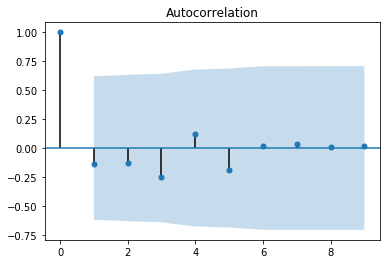

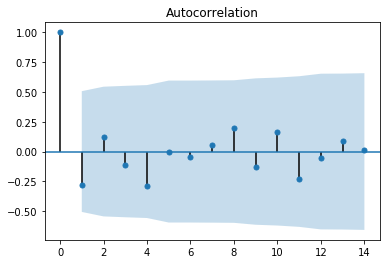

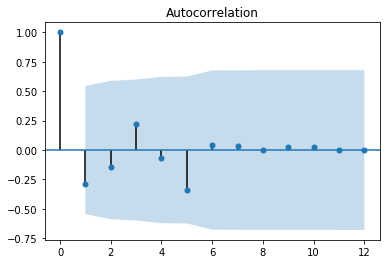

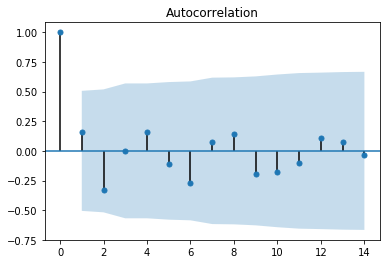

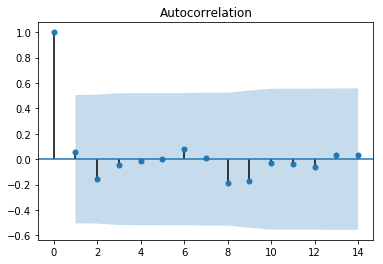

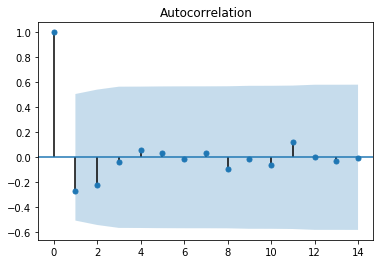

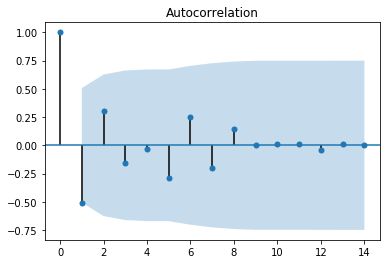

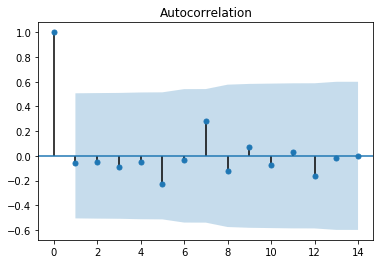

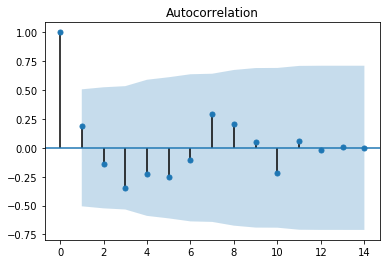

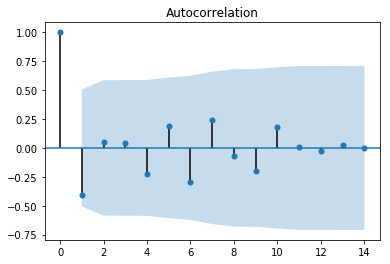

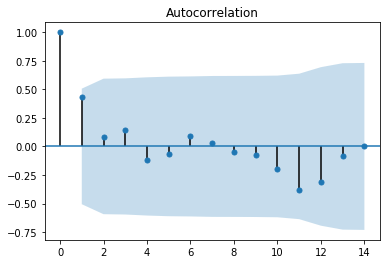

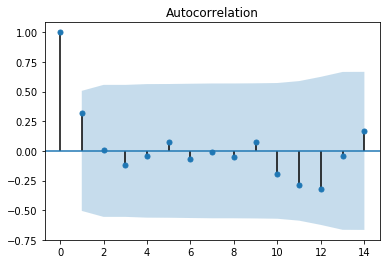

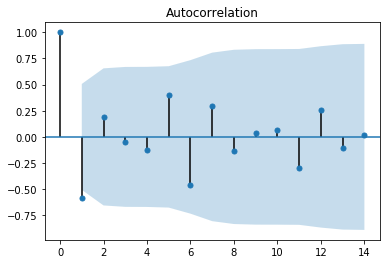

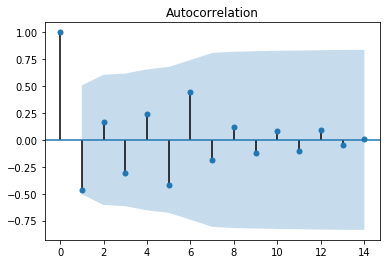

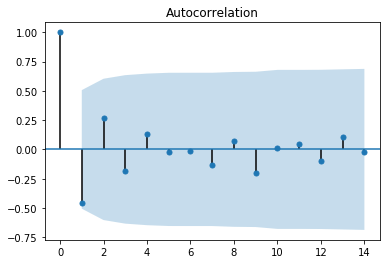

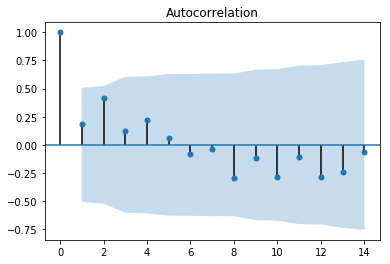

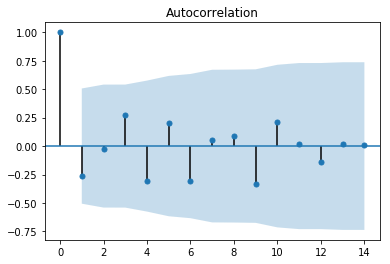

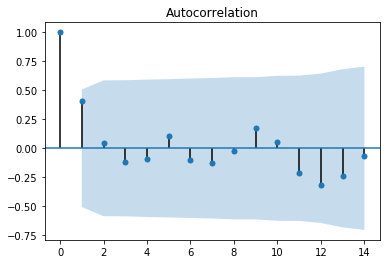

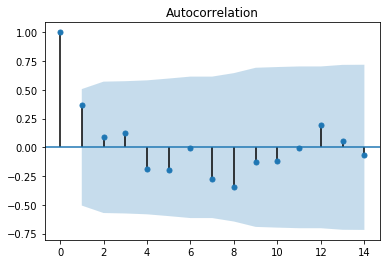

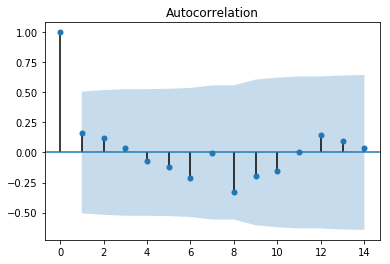

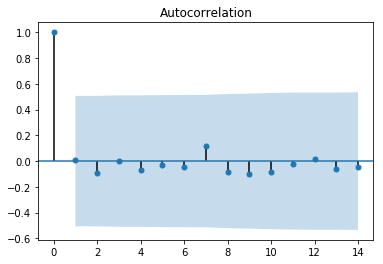

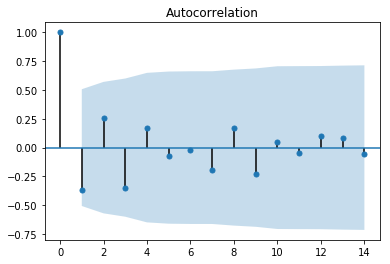

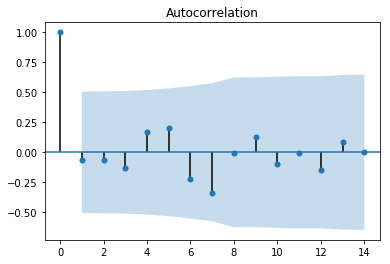

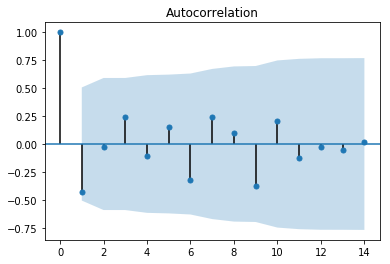

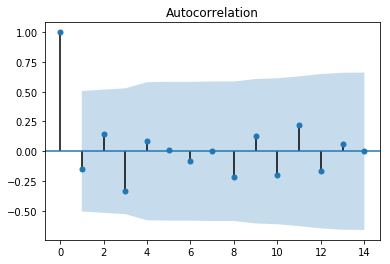

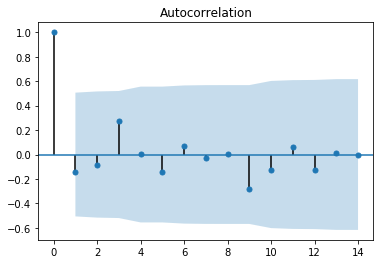

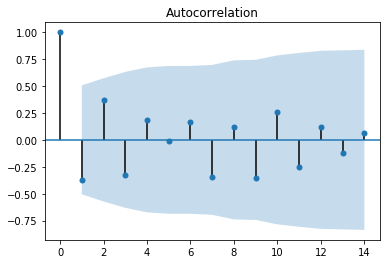

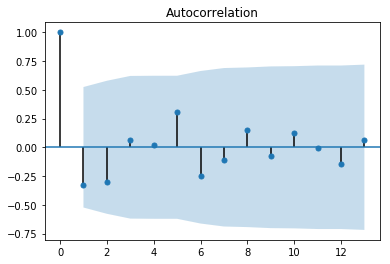

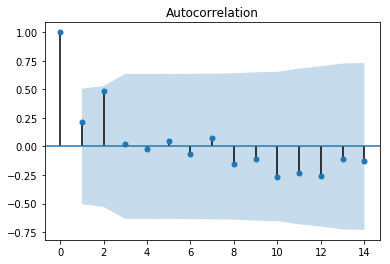

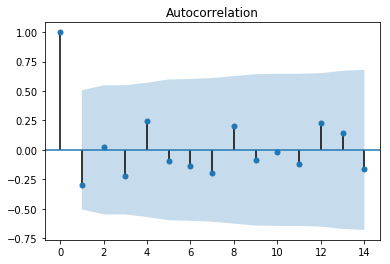

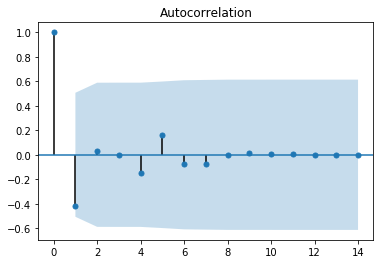

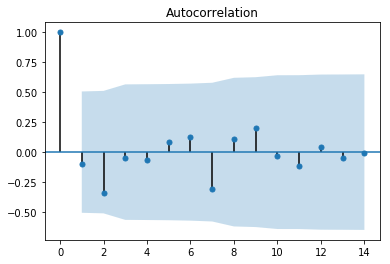

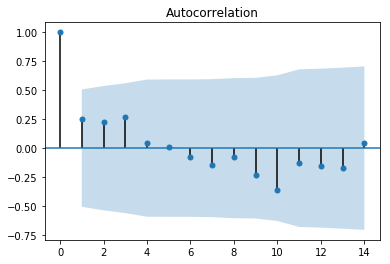

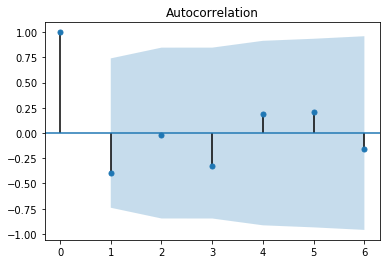

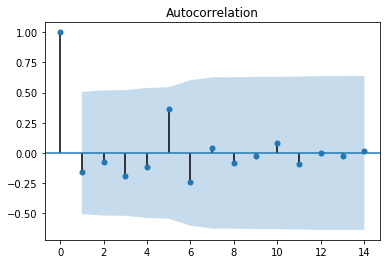

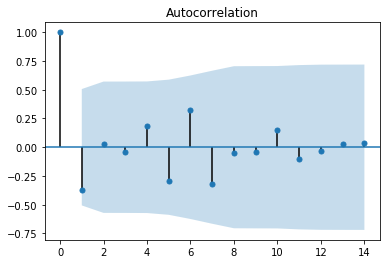

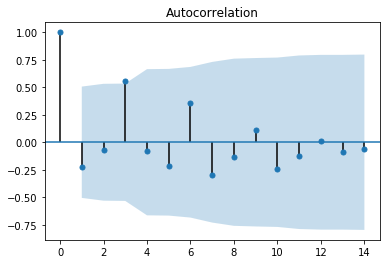

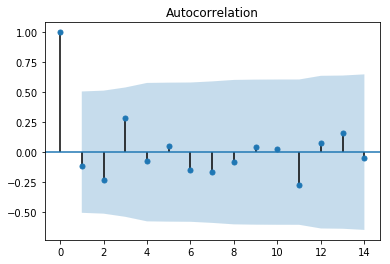

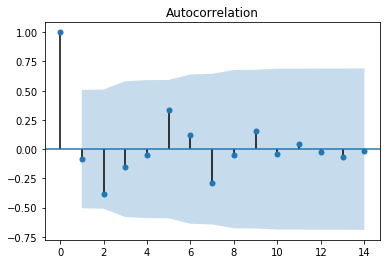

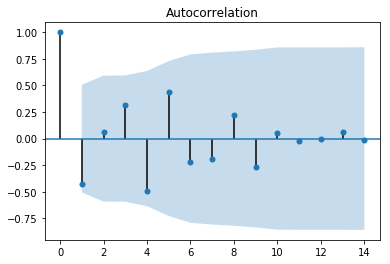

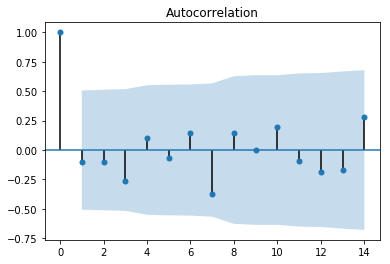

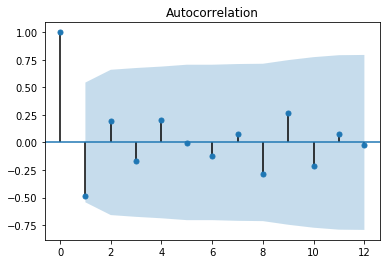

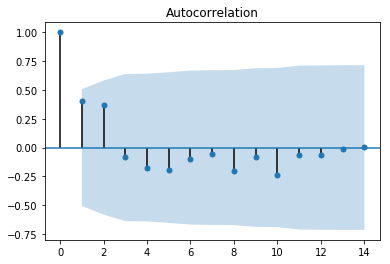

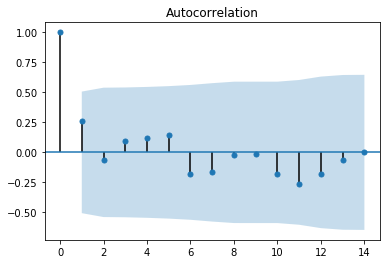

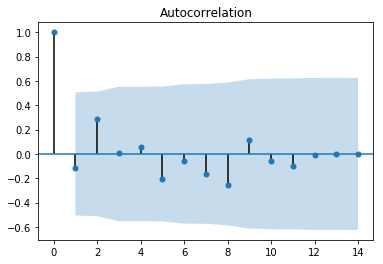

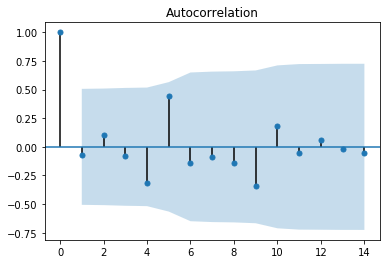

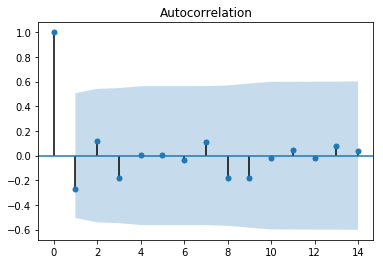

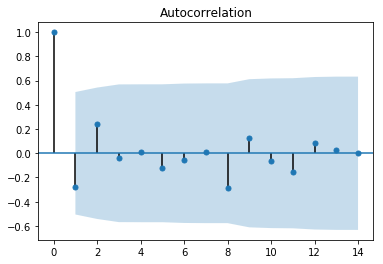

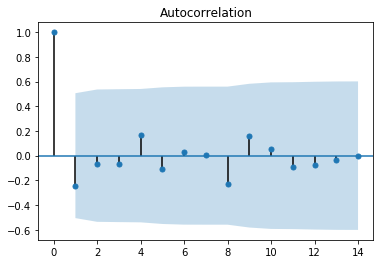

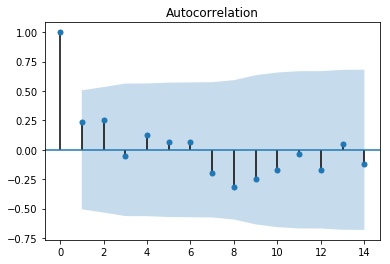

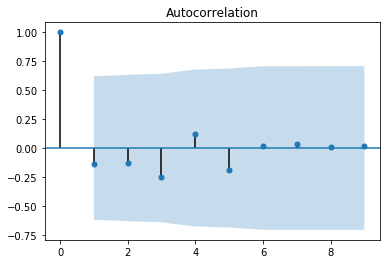

In [121]:
autocorrelation(new_list)

In [124]:
def partial_autocorrealtion (list_):
    for df in list_:
        plot = plot_pacf(df['Deaths'], alpha=.05, lags=20)
#         warnings.filterwarnings("ignore")

    return plot

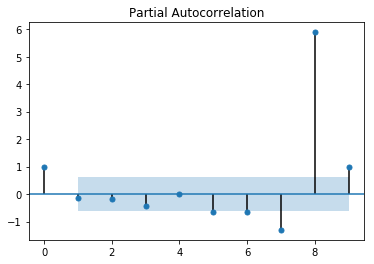

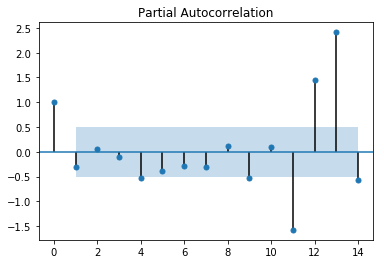

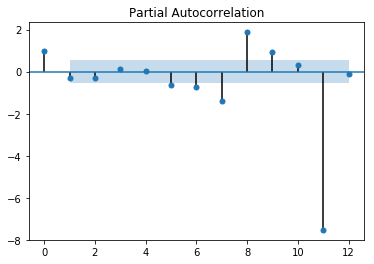

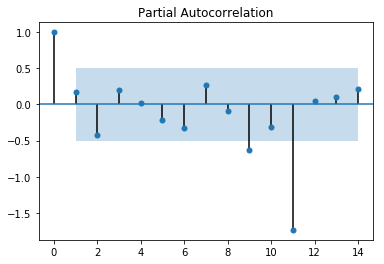

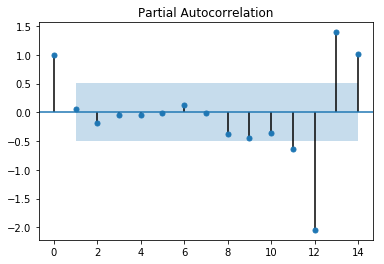

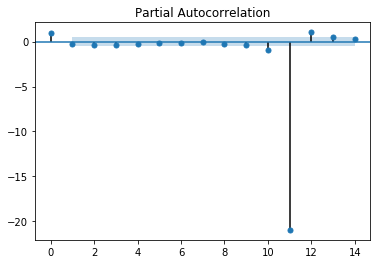

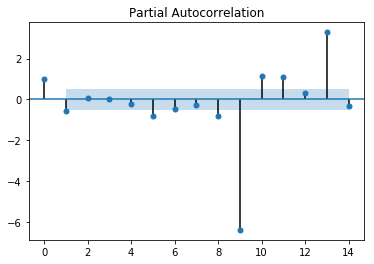

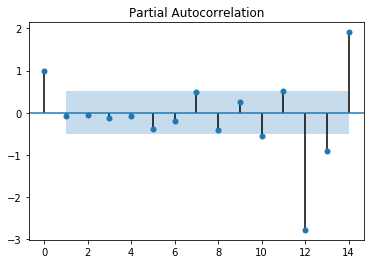

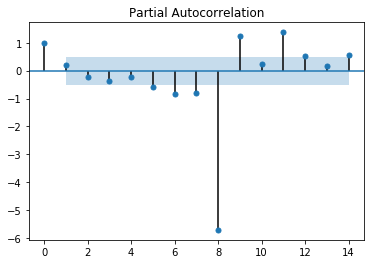

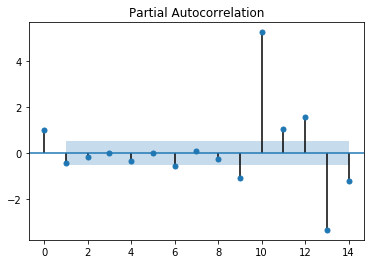

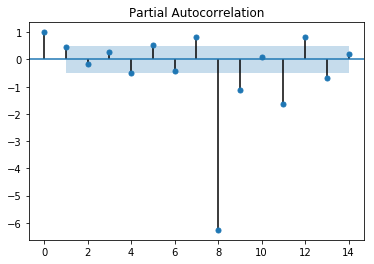

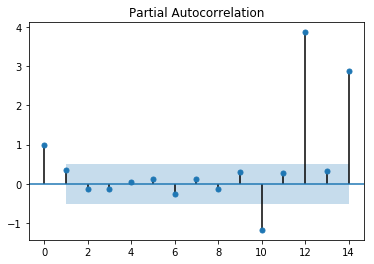

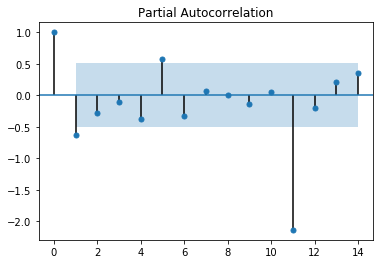

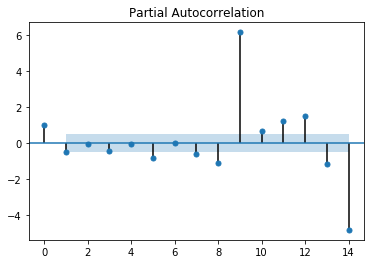

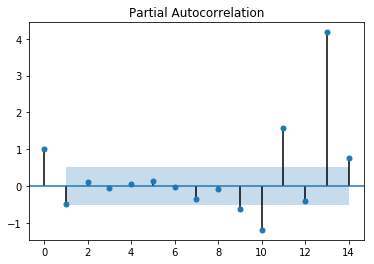

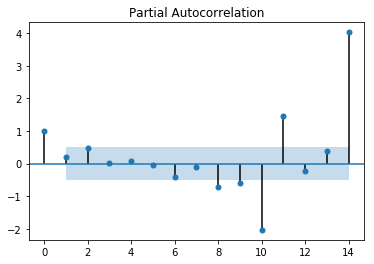

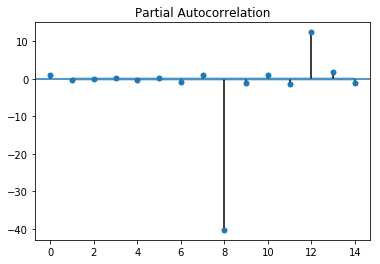

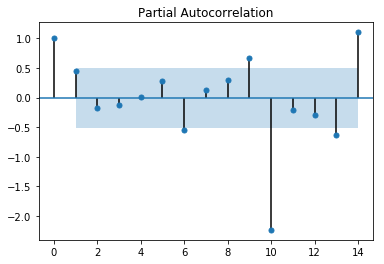

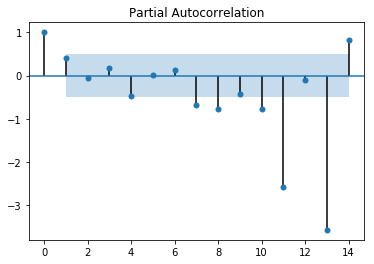

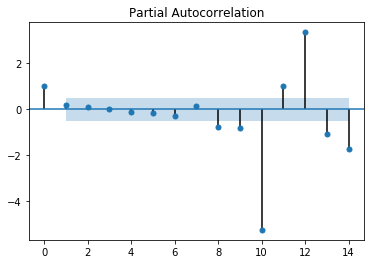

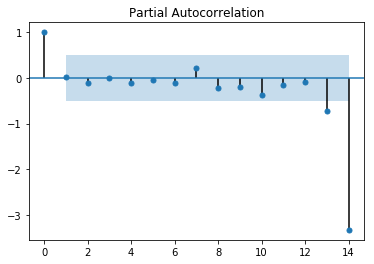

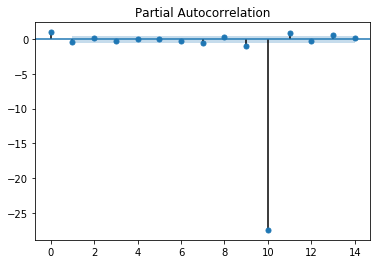

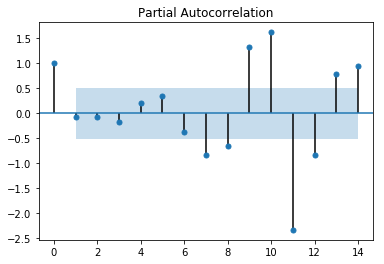

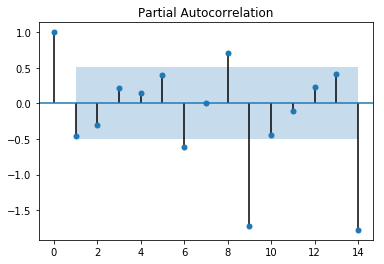

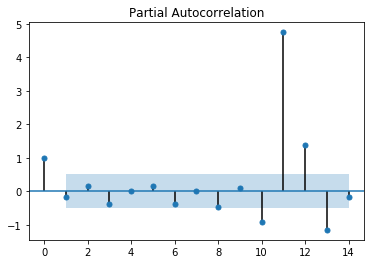

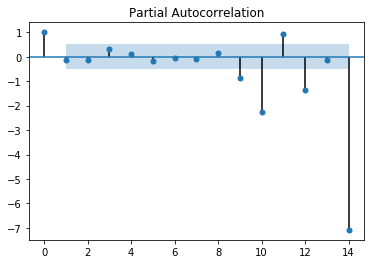

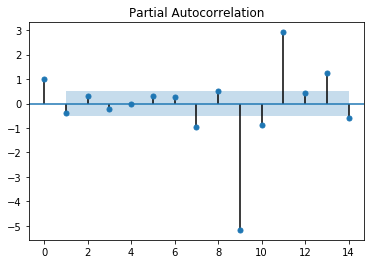

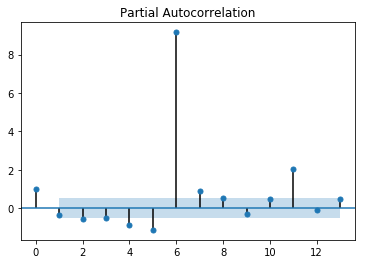

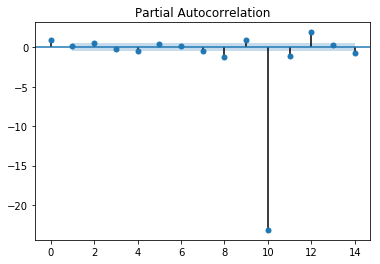

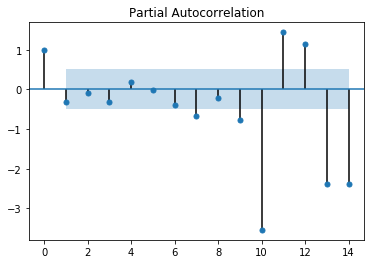

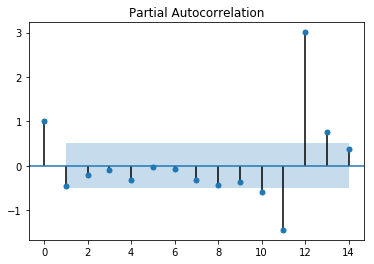

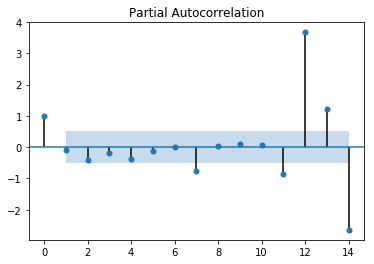

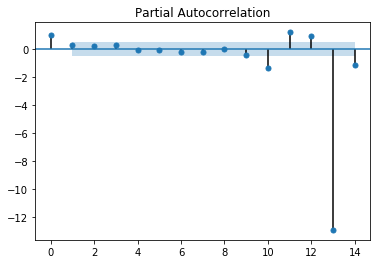

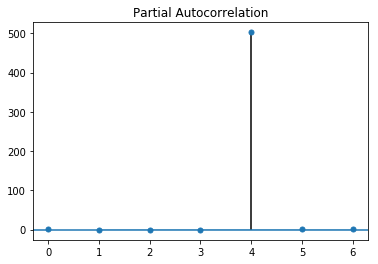

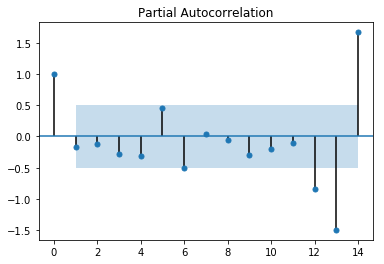

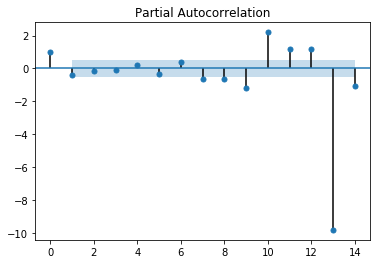

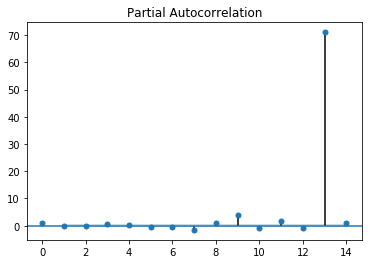

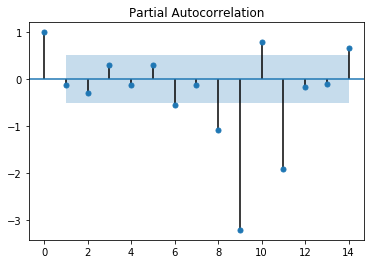

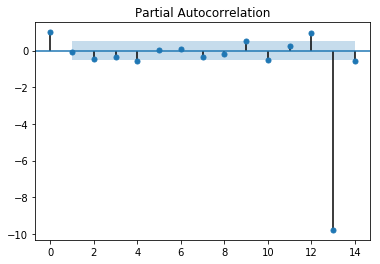

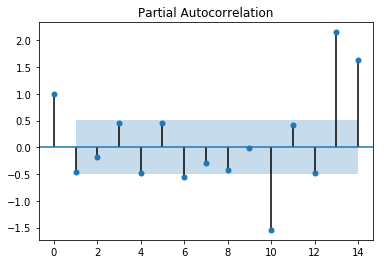

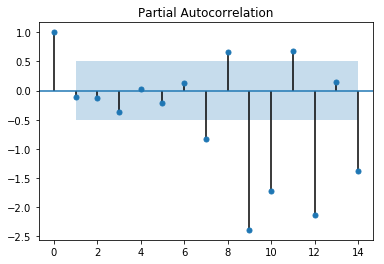

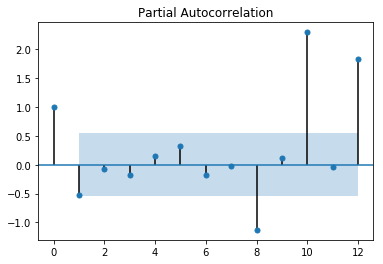

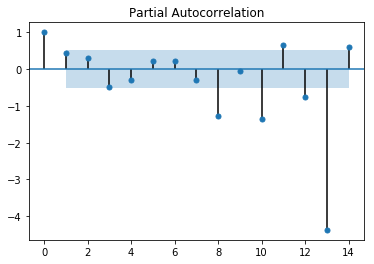

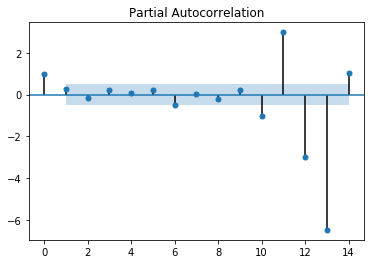

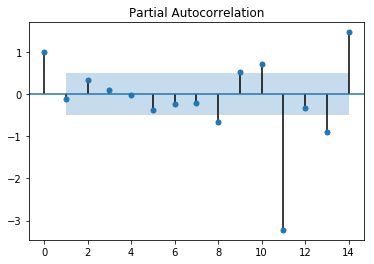

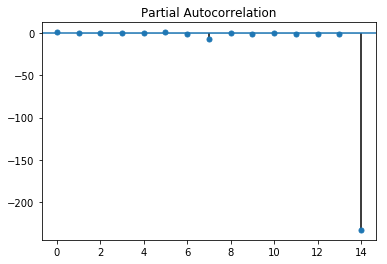

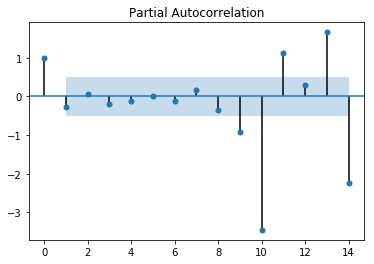

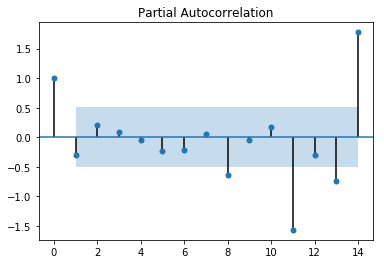

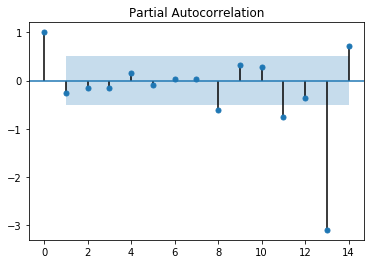

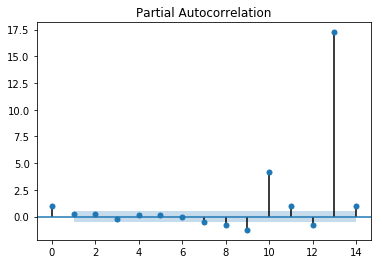

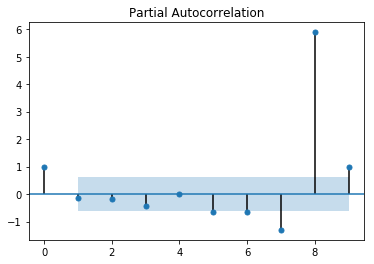

In [125]:
partial_autocorrealtion(new_list)

In [127]:
def predictions( list_):
    list_of_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']
    
    for i ,u  in zip(list_ , list_of_states):
        X = i['Deaths']
        # size = int(len(X) * 0.66)
        train, test = X[0:9], X[9:len(X)]
        history = [x for x in train]
        predictions = list()
        for t in test:
            model = ARIMA(history, order=(1,0,0))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = t
            history.append(obs)
            print(f' State : {u} , predicted : {yhat} ,expected= {obs} ')
        error = mean_squared_error(test, predictions)
        print('Test MSE: %.3f' % error)
        # plot
#         pyplot.plot(test ,alpha =0.5)
#         pyplot.plot(predictions, alpha = 1 ,color='red')
#         pyplot.show()
        

In [128]:
predictions(new_list)

 State : Alabama , predicted : [0.20926715] ,expected= 0.07410797215372167 
 State : Alabama , predicted : [0.21948088] ,expected= -0.07924937165414025 
 State : Alabama , predicted : [0.25502517] ,expected= -0.0749013081731178 
 State : Alabama , predicted : [0.20223654] ,expected= -0.028170876966695957 
 State : Alabama , predicted : [0.15880397] ,expected= 0.0 
 State : Alabama , predicted : [0.13600577] ,expected= 0.47712109701459937 
Test MSE: 0.069
 State : Alaska , predicted : [0.26122376] ,expected= 0.013986241974739855 
 State : Alaska , predicted : [0.14771114] ,expected= 0.11778303565638382 
 State : Alaska , predicted : [0.11701068] ,expected= -0.16034265007517945 
 State : Alaska , predicted : [0.1684452] ,expected= 0.13534134786976182 
Test MSE: 0.035
 State : Arizona , predicted : [0.08794786] ,expected= 0.19358474907266476 
 State : Arizona , predicted : [0.06451271] ,expected= 0.03922071315328157 
 State : Arizona , predicted : [0.10560977] ,expected= -0.08673169582433

 State : Louisiana , predicted : [0.04887702] ,expected= 0.04301738508369102 
 State : Louisiana , predicted : [0.08604665] ,expected= 0.11895194286136501 
 State : Louisiana , predicted : [0.0980338] ,expected= 0.22501096548900534 
 State : Louisiana , predicted : [0.12138882] ,expected= 0.261215499263618 
Test MSE: 0.033
 State : Maine , predicted : [0.01133245] ,expected= 0.10835789519680095 
 State : Maine , predicted : [-0.00317645] ,expected= -0.1292117314800061 
 State : Maine , predicted : [0.04935403] ,expected= 0.0738342620110517 
 State : Maine , predicted : [-0.01420085] ,expected= 0.17128819602193257 
 State : Maine , predicted : [-0.01740177] ,expected= 0.12921173148000697 
 State : Maine , predicted : [0.01890966] ,expected= 0.2053310372899606 
Test MSE: 0.019
 State : Maryland , predicted : [0.15476641] ,expected= 0.03846628082779624 
 State : Maryland , predicted : [0.08041092] ,expected= -0.09735629683202252 
 State : Maryland , predicted : [0.12685441] ,expected= 0.1

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [173]:
def Arima_model (list_df):
    list_of_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']
    for i , u in zip(list_df , list_of_states):
        model = ARIMA(i['Deaths'], order=(0,0,1))
        model_fit = model.fit(disp=0)
        print(model_fit.summary())
        predict = model_fit.forecast()[0]
        warnings.filterwarnings("ignore")
        model_fit.plot_predict('2000-01-01','2020-01-01')
        plt.title(u)
        plt.xlabel('Years')
        plt.ylabel('Deaths')
        # the prediction vs the actual value
        plt.show()



In [164]:
new_list[33 :40]

[                 Year    Deaths
 Year                           
 2000-01-01 2000-01-01 -0.242532
 2001-01-01 2001-01-01  0.227357
 2002-01-01 2002-01-01 -0.109788
 2003-01-01 2003-01-01  0.046675
 2004-01-01 2004-01-01 -0.177772
 2005-01-01 2005-01-01  0.120805
 2006-01-01 2006-01-01  0.599215
 2007-01-01 2007-01-01  0.007547
 2008-01-01 2008-01-01  0.094113
 2009-01-01 2009-01-01 -0.054495
 2010-01-01 2010-01-01  0.007201
 2011-01-01 2011-01-01  0.239688
 2012-01-01 2012-01-01  0.106348
 2013-01-01 2013-01-01  0.094387
 2014-01-01 2014-01-01  0.031261,                  Year    Deaths
 Year                           
 2000-01-01 2000-01-01  0.405465
 2001-01-01 2001-01-01  0.276509
 2002-01-01 2002-01-01  0.254119
 2003-01-01 2003-01-01 -0.142598
 2004-01-01 2004-01-01  0.336113
 2005-01-01 2005-01-01  0.059251
 2006-01-01 2006-01-01  0.132897
 2007-01-01 2007-01-01  0.112005
 2008-01-01 2008-01-01  0.133697
 2009-01-01 2009-01-01 -0.186735
 2010-01-01 2010-01-01  0.513894
 2011-01-0

In [159]:
new_list[32]

Year    Deaths
Year                           
2003-01-01 2003-01-01 -0.336472
2004-01-01 2004-01-01  0.262364
2008-01-01 2008-01-01  0.632523
2009-01-01 2009-01-01 -0.575364
2010-01-01 2010-01-01  0.000000
2011-01-01 2011-01-01 -0.587787
2014-01-01 2014-01-01  0.887303

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  -4.829
Method:                       css-mle   S.D. of innovations              0.334
Date:                Sun, 08 Sep 2019   AIC                             15.657
Time:                        19:03:11   BIC                             17.781
Sample:                    01-01-2000   HQIC                            15.634
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1189      0.092      1.291      0.219      -0.062       0.299
ar.L1.Deaths     0.0597      0.271      0.220      0.829      -0.472       0.591
                                    Roots   

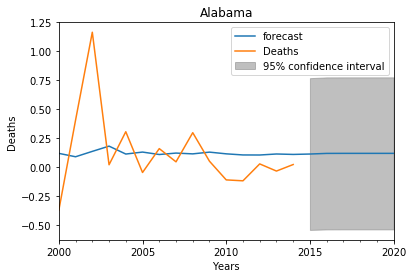

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  -3.346
Method:                       css-mle   S.D. of innovations              0.302
Date:                Sun, 08 Sep 2019   AIC                             12.692
Time:                        19:03:11   BIC                             14.817
Sample:                    01-01-2000   HQIC                            12.670
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0257      0.062      0.415      0.685      -0.096       0.147
ar.L1.Deaths    -0.2799      0.252     -1.112      0.286      -0.773       0.213
                                    Roots   

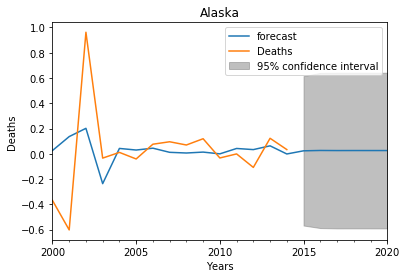

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  12.807
Method:                       css-mle   S.D. of innovations              0.102
Date:                Sun, 08 Sep 2019   AIC                            -19.615
Time:                        19:03:11   BIC                            -17.491
Sample:                    01-01-2000   HQIC                           -19.638
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0737      0.018      4.129      0.001       0.039       0.109
ar.L1.Deaths    -0.5107      0.214     -2.389      0.033      -0.930      -0.092
                                    Roots   

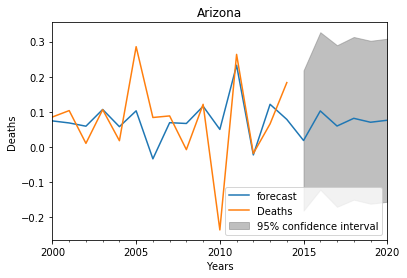

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   1.484
Method:                       css-mle   S.D. of innovations              0.219
Date:                Sun, 08 Sep 2019   AIC                              3.032
Time:                        19:03:12   BIC                              5.157
Sample:                    01-01-2000   HQIC                             3.010
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0804      0.054      1.496      0.159      -0.025       0.186
ar.L1.Deaths    -0.0569      0.251     -0.226      0.825      -0.550       0.436
                                    Roots   

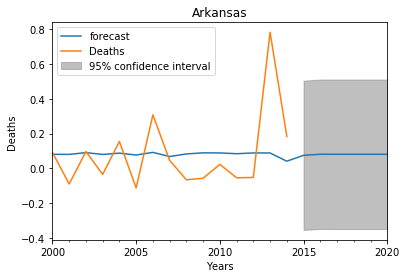

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   3.474
Method:                       css-mle   S.D. of innovations              0.192
Date:                Sun, 08 Sep 2019   AIC                             -0.947
Time:                        19:03:12   BIC                              1.177
Sample:                    01-01-2000   HQIC                            -0.970
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0911      0.059      1.535      0.149      -0.025       0.207
ar.L1.Deaths     0.1775      0.245      0.724      0.482      -0.303       0.658
                                    Roots   

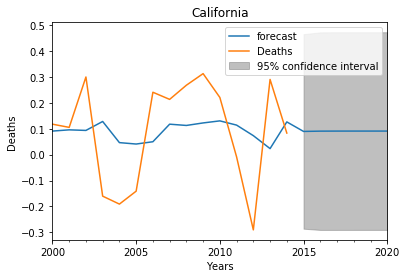

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  -9.888
Method:                       css-mle   S.D. of innovations              0.465
Date:                Sun, 08 Sep 2019   AIC                             25.777
Time:                        19:03:12   BIC                             27.901
Sample:                    01-01-2000   HQIC                            25.754
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0483      0.088      0.552      0.590      -0.123       0.220
ar.L1.Deaths    -0.3999      0.229     -1.748      0.104      -0.849       0.049
                                    Roots   

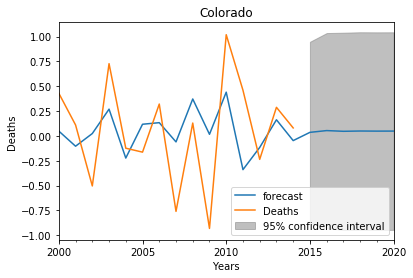

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   9.065
Method:                       css-mle   S.D. of innovations              0.131
Date:                Sun, 08 Sep 2019   AIC                            -12.131
Time:                        19:03:12   BIC                            -10.006
Sample:                    01-01-2000   HQIC                           -12.153
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0959      0.063      1.531      0.150      -0.027       0.219
ar.L1.Deaths     0.4826      0.234      2.059      0.060       0.023       0.942
                                    Roots   

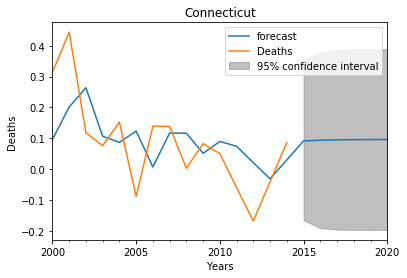

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  10.098
Method:                       css-mle   S.D. of innovations              0.122
Date:                Sun, 08 Sep 2019   AIC                            -14.195
Time:                        19:03:12   BIC                            -12.071
Sample:                    01-01-2000   HQIC                           -14.218
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1738      0.070      2.483      0.027       0.037       0.311
ar.L1.Deaths     0.5359      0.279      1.922      0.077      -0.010       1.082
                                    Roots   

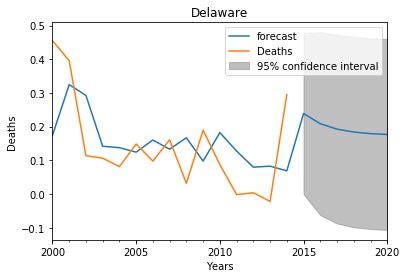

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   4.790
Method:                       css-mle   S.D. of innovations              0.174
Date:                Sun, 08 Sep 2019   AIC                             -3.580
Time:                        19:03:13   BIC                             -1.456
Sample:                    01-01-2000   HQIC                            -3.603
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0670      0.029      2.293      0.039       0.010       0.124
ar.L1.Deaths    -0.5727      0.200     -2.858      0.013      -0.966      -0.180
                                    Roots   

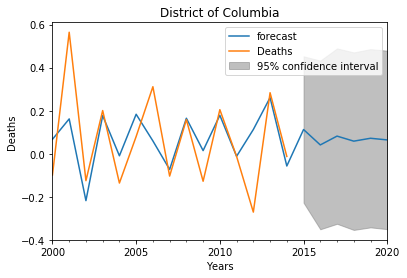

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   8.839
Method:                       css-mle   S.D. of innovations              0.133
Date:                Sun, 08 Sep 2019   AIC                            -11.677
Time:                        19:03:13   BIC                             -9.553
Sample:                    01-01-2000   HQIC                           -11.700
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0532      0.024      2.192      0.047       0.006       0.101
ar.L1.Deaths    -0.4481      0.221     -2.025      0.064      -0.882      -0.014
                                    Roots   

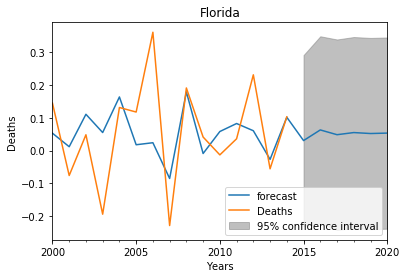

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   4.243
Method:                       css-mle   S.D. of innovations              0.181
Date:                Sun, 08 Sep 2019   AIC                             -2.486
Time:                        19:03:13   BIC                             -0.362
Sample:                    01-01-2000   HQIC                            -2.509
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1559      0.033      4.772      0.000       0.092       0.220
ar.L1.Deaths    -0.4613      0.224     -2.057      0.060      -0.901      -0.022
                                    Roots   

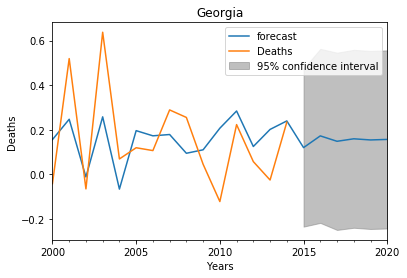

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   7.352
Method:                       css-mle   S.D. of innovations              0.148
Date:                Sun, 08 Sep 2019   AIC                             -8.704
Time:                        19:03:13   BIC                             -6.580
Sample:                    01-01-2000   HQIC                            -8.727
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1582      0.048      3.268      0.006       0.063       0.253
ar.L1.Deaths     0.2201      0.277      0.796      0.440      -0.322       0.762
                                    Roots   

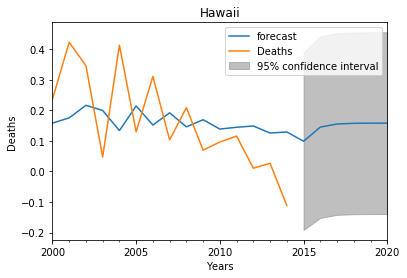

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  -2.843
Method:                       css-mle   S.D. of innovations              0.292
Date:                Sun, 08 Sep 2019   AIC                             11.687
Time:                        19:03:14   BIC                             13.811
Sample:                    01-01-2000   HQIC                            11.664
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1360      0.061      2.241      0.043       0.017       0.255
ar.L1.Deaths    -0.2603      0.246     -1.059      0.309      -0.742       0.221
                                    Roots   

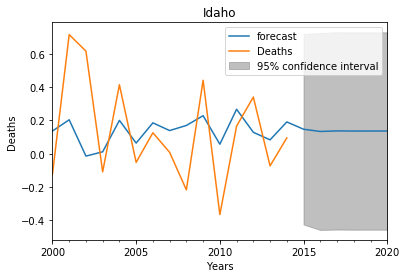

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   8.223
Method:                       css-mle   S.D. of innovations              0.138
Date:                Sun, 08 Sep 2019   AIC                            -10.446
Time:                        19:03:14   BIC                             -8.321
Sample:                    01-01-2000   HQIC                           -10.468
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1934      0.076      2.537      0.025       0.044       0.343
ar.L1.Deaths     0.5561      0.248      2.239      0.043       0.069       1.043
                                    Roots   

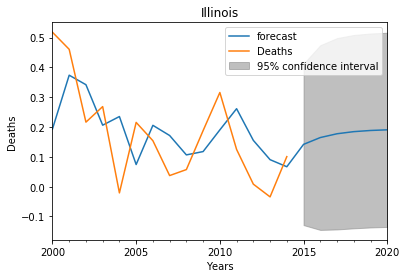

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   0.471
Method:                       css-mle   S.D. of innovations              0.233
Date:                Sun, 08 Sep 2019   AIC                              5.058
Time:                        19:03:14   BIC                              7.182
Sample:                    01-01-2000   HQIC                             5.035
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1576      0.101      1.554      0.144      -0.041       0.356
ar.L1.Deaths     0.4315      0.250      1.728      0.108      -0.058       0.921
                                    Roots   

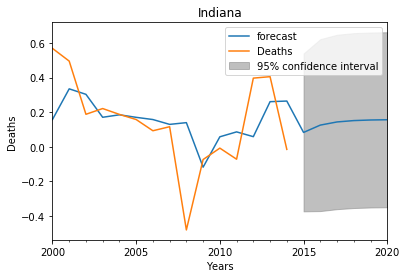

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   2.978
Method:                       css-mle   S.D. of innovations              0.198
Date:                Sun, 08 Sep 2019   AIC                              0.043
Time:                        19:03:14   BIC                              2.168
Sample:                    01-01-2000   HQIC                             0.021
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1168      0.061      1.918      0.077      -0.003       0.236
ar.L1.Deaths     0.1649      0.257      0.642      0.532      -0.338       0.668
                                    Roots   

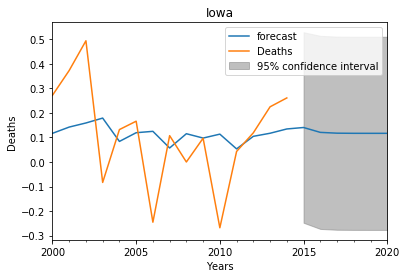

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  11.974
Method:                       css-mle   S.D. of innovations              0.109
Date:                Sun, 08 Sep 2019   AIC                            -17.948
Time:                        19:03:14   BIC                            -15.824
Sample:                    01-01-2000   HQIC                           -17.971
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0412      0.029      1.444      0.172      -0.015       0.097
ar.L1.Deaths     0.0130      0.273      0.047      0.963      -0.522       0.548
                                    Roots   

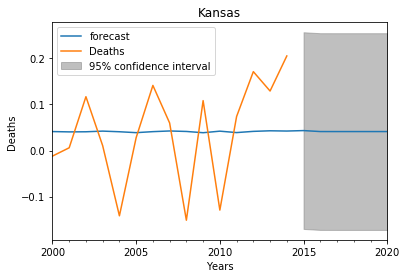

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   5.760
Method:                       css-mle   S.D. of innovations              0.164
Date:                Sun, 08 Sep 2019   AIC                             -5.520
Time:                        19:03:15   BIC                             -3.396
Sample:                    01-01-2000   HQIC                            -5.542
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0807      0.031      2.587      0.023       0.020       0.142
ar.L1.Deaths    -0.3828      0.241     -1.589      0.136      -0.855       0.089
                                    Roots   

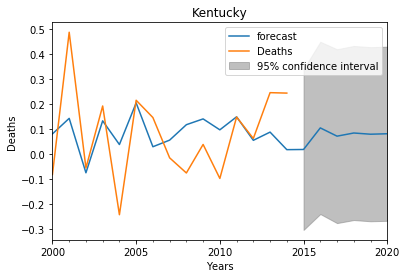

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   7.031
Method:                       css-mle   S.D. of innovations              0.151
Date:                Sun, 08 Sep 2019   AIC                             -8.061
Time:                        19:03:15   BIC                             -5.937
Sample:                    01-01-2000   HQIC                            -8.084
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1351      0.037      3.662      0.003       0.063       0.207
ar.L1.Deaths    -0.0685      0.265     -0.258      0.800      -0.589       0.452
                                    Roots   

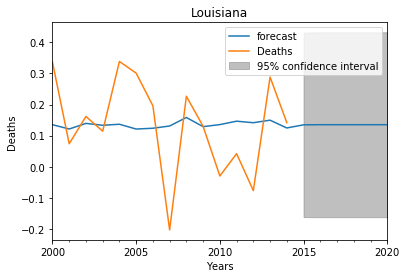

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   9.743
Method:                       css-mle   S.D. of innovations              0.126
Date:                Sun, 08 Sep 2019   AIC                            -13.487
Time:                        19:03:15   BIC                            -11.362
Sample:                    01-01-2000   HQIC                           -13.509
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1091      0.023      4.658      0.000       0.063       0.155
ar.L1.Deaths    -0.4131      0.227     -1.824      0.091      -0.857       0.031
                                    Roots   

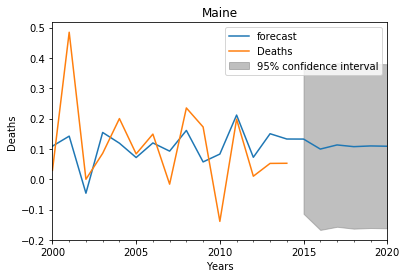

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   0.247
Method:                       css-mle   S.D. of innovations              0.238
Date:                Sun, 08 Sep 2019   AIC                              5.505
Time:                        19:03:15   BIC                              7.630
Sample:                    01-01-2000   HQIC                             5.483
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1351      0.054      2.517      0.026       0.030       0.240
ar.L1.Deaths    -0.1567      0.257     -0.609      0.553      -0.661       0.347
                                    Roots   

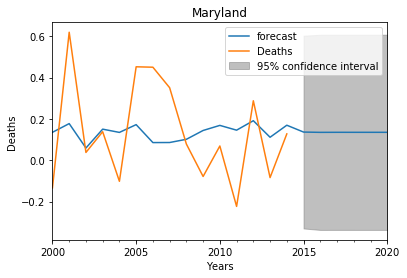

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   8.686
Method:                       css-mle   S.D. of innovations              0.136
Date:                Sun, 08 Sep 2019   AIC                            -11.373
Time:                        19:03:15   BIC                             -9.249
Sample:                    01-01-2000   HQIC                           -11.395
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1272      0.031      4.108      0.001       0.067       0.188
ar.L1.Deaths    -0.1411      0.256     -0.552      0.590      -0.642       0.360
                                    Roots   

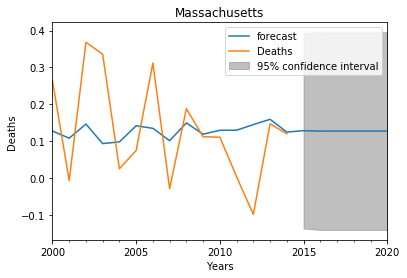

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  -2.157
Method:                       css-mle   S.D. of innovations              0.278
Date:                Sun, 08 Sep 2019   AIC                             10.314
Time:                        19:03:16   BIC                             12.438
Sample:                    01-01-2000   HQIC                            10.291
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0932      0.052      1.784      0.098      -0.009       0.195
ar.L1.Deaths    -0.4079      0.243     -1.677      0.117      -0.885       0.069
                                    Roots   

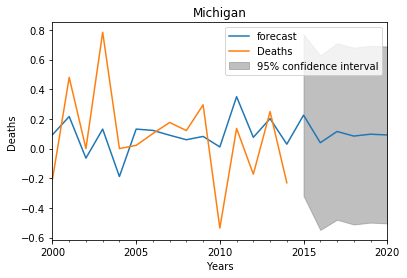

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   14
Model:                     ARMA(1, 0)   Log Likelihood                  -6.981
Method:                       css-mle   S.D. of innovations              0.396
Date:                Sun, 08 Sep 2019   AIC                             19.962
Time:                        19:03:16   BIC                             21.879
Sample:                    01-01-2001   HQIC                            19.785
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0770      0.079      0.973      0.350      -0.078       0.232
ar.L1.Deaths    -0.3751      0.262     -1.433      0.177      -0.888       0.138
                                    Roots   

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

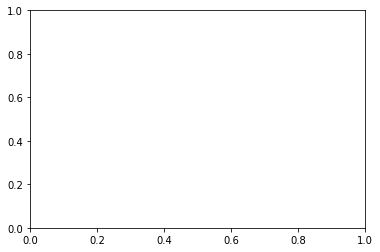

In [172]:
Arima_model(new_list[3:])

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   3.742
Method:                       css-mle   S.D. of innovations              0.188
Date:                Sun, 08 Sep 2019   AIC                             -1.483
Time:                        19:04:54   BIC                              0.641
Sample:                    01-01-2000   HQIC                            -1.506
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0719      0.037      1.961      0.072    5.52e-05       0.144
ma.L1.Deaths    -0.2823      0.397     -0.711      0.490      -1.061       0.496
                                    Roots   

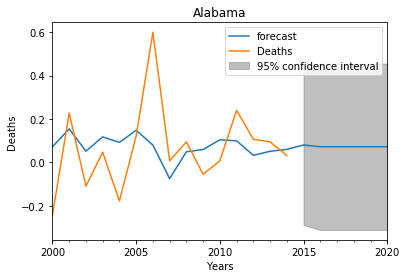

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   6.887
Method:                       css-mle   S.D. of innovations              0.139
Date:                Sun, 08 Sep 2019   AIC                             -7.774
Time:                        19:04:55   BIC                             -5.649
Sample:                    01-01-2000   HQIC                            -7.796
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1414      0.008     18.705      0.000       0.127       0.156
ma.L1.Deaths    -0.9999      0.224     -4.459      0.001      -1.439      -0.560
                                    Roots   

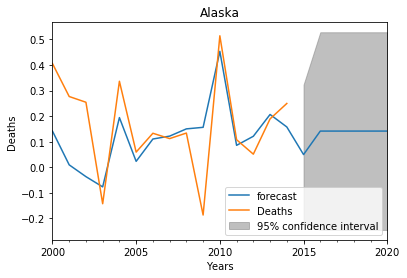

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   2.729
Method:                       css-mle   S.D. of innovations              0.201
Date:                Sun, 08 Sep 2019   AIC                              0.542
Time:                        19:04:55   BIC                              2.666
Sample:                    01-01-2000   HQIC                             0.519
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1122      0.041      2.732      0.017       0.032       0.193
ma.L1.Deaths    -0.2262      0.219     -1.032      0.321      -0.656       0.204
                                    Roots   

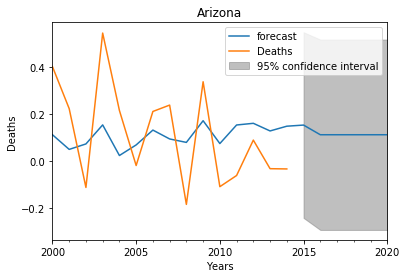

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   9.698
Method:                       css-mle   S.D. of innovations              0.127
Date:                Sun, 08 Sep 2019   AIC                            -13.396
Time:                        19:04:55   BIC                            -11.272
Sample:                    01-01-2000   HQIC                           -13.418
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0377      0.027      1.380      0.191      -0.016       0.091
ma.L1.Deaths    -0.1802      0.274     -0.657      0.522      -0.718       0.357
                                    Roots   

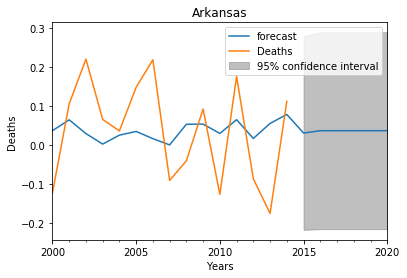

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   9.432
Method:                       css-mle   S.D. of innovations              0.118
Date:                Sun, 08 Sep 2019   AIC                            -12.864
Time:                        19:04:55   BIC                            -10.740
Sample:                    01-01-2000   HQIC                           -12.887
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0824      0.006     12.917      0.000       0.070       0.095
ma.L1.Deaths    -1.0000      0.203     -4.937      0.000      -1.397      -0.603
                                    Roots   

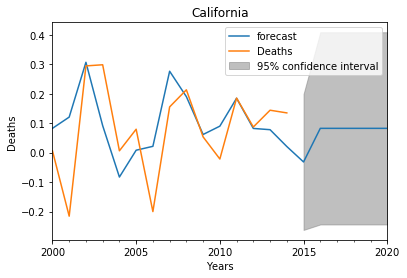

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   0.608
Method:                       css-mle   S.D. of innovations              0.212
Date:                Sun, 08 Sep 2019   AIC                              4.784
Time:                        19:04:56   BIC                              6.908
Sample:                    01-01-2000   HQIC                             4.761
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0808      0.011      7.033      0.000       0.058       0.103
ma.L1.Deaths    -0.9999      0.262     -3.821      0.002      -1.513      -0.487
                                    Roots   

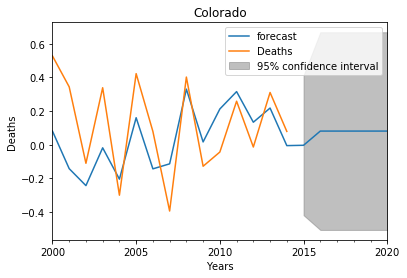

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   0.337
Method:                       css-mle   S.D. of innovations              0.231
Date:                Sun, 08 Sep 2019   AIC                              5.326
Time:                        19:04:56   BIC                              7.451
Sample:                    01-01-2000   HQIC                             5.304
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1220      0.026      4.651      0.000       0.071       0.173
ma.L1.Deaths    -0.7215      0.793     -0.910      0.379      -2.276       0.832
                                    Roots   

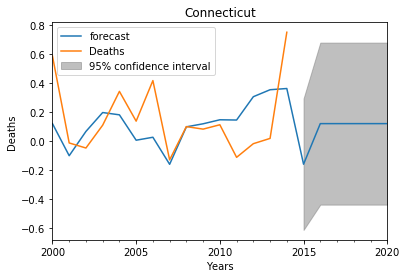

In [174]:
Arima_model(new_list[33 : 40])

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                   0.676
Method:                       css-mle   S.D. of innovations              0.231
Date:                Sun, 08 Sep 2019   AIC                              4.649
Time:                        18:17:05   BIC                              6.773
Sample:                    01-01-2000   HQIC                             4.626
                         - 01-01-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1259      0.047      2.699      0.018       0.034       0.217
ar.L1.Deaths    -0.3020      0.255     -1.183      0.258      -0.803       0.199
                                    Roots   

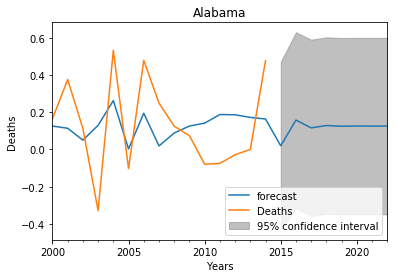

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   13
Model:                     ARMA(1, 0)   Log Likelihood                 -10.662
Method:                       css-mle   S.D. of innovations              0.548
Date:                Sun, 08 Sep 2019   AIC                             27.323
Time:                        18:17:05   BIC                             29.018
Sample:                             0   HQIC                            26.975
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0963      0.122      0.792      0.445      -0.142       0.335
ar.L1.Deaths    -0.2708      0.255     -1.061      0.311      -0.771       0.229
                                    Roots   

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

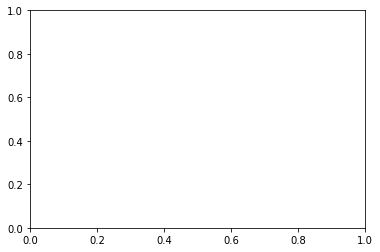

In [170]:
Arima_model(new_list[: 35])

In [213]:

model_fit.forecast(36)[0]

array([0.03376896, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216])

In [151]:
from matplotlib import pyplot

def plot_1 (list_):
    for i in new_list:
        model = ARIMA(i['Deaths'], order=(0,0,1))
        model_fit = model.fit(disp=0)
        residuals = model_fit.resid
        residuals.plot()
        pyplot.show()
        residuals.plot(kind='kde')
        pyplot.show()
        print(residuals.describe())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



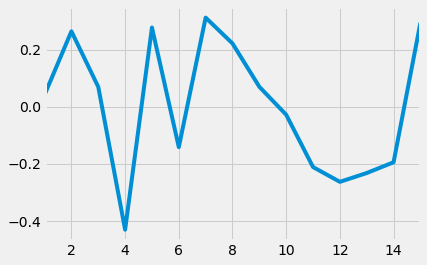

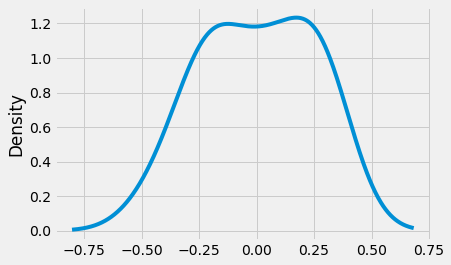

count    15.000000
mean      0.003007
std       0.239519
min      -0.431017
25%      -0.203223
50%       0.041388
75%       0.242686
max       0.311906
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



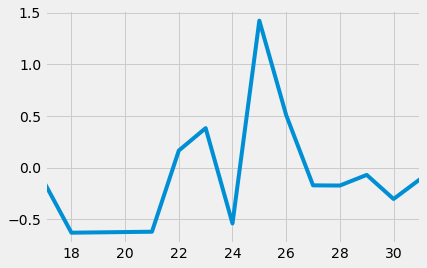

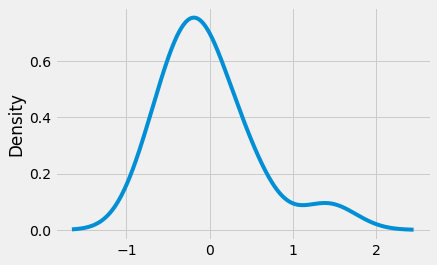

count    13.000000
mean     -0.022307
std       0.556200
min      -0.629686
25%      -0.303529
50%      -0.148874
75%       0.165019
max       1.422446
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



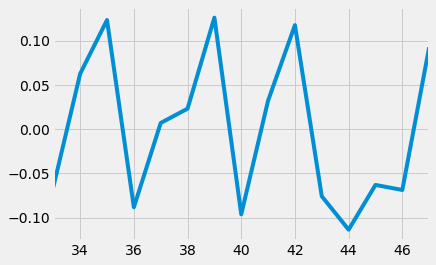

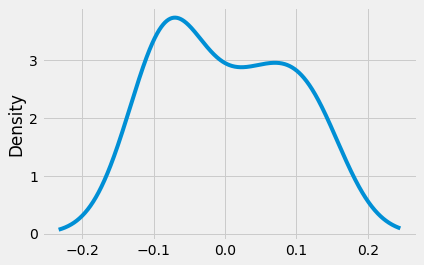

count    15.000000
mean      0.000848
std       0.087645
min      -0.113580
25%      -0.072265
50%       0.006939
75%       0.077487
max       0.125911
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



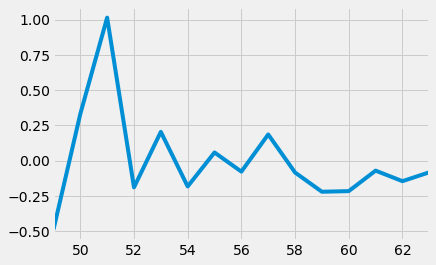

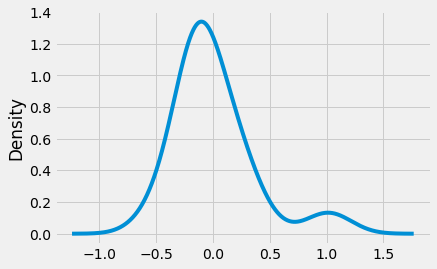

count    15.000000
mean      0.002784
std       0.345380
min      -0.489347
25%      -0.185813
50%      -0.082038
75%       0.122482
max       1.015328
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



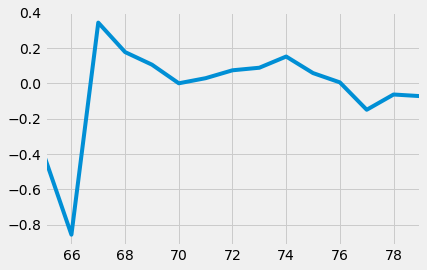

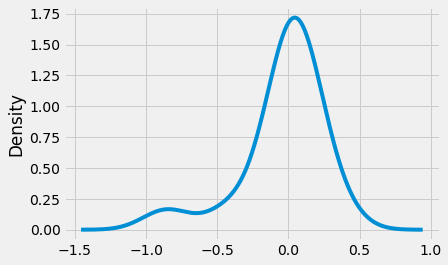

count    15.000000
mean     -0.035254
std       0.283027
min      -0.857217
25%      -0.068116
50%       0.028916
75%       0.096736
max       0.343444
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



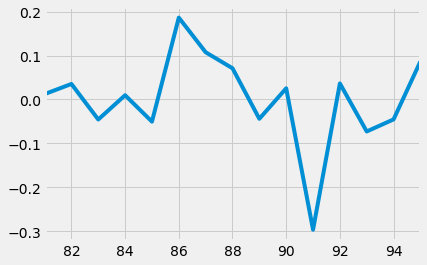

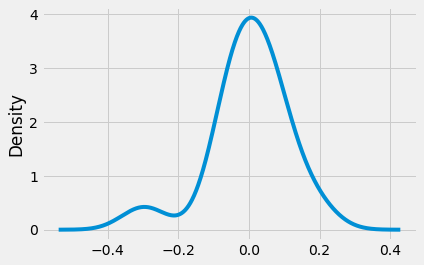

count    15.000000
mean      0.001120
std       0.108374
min      -0.296713
25%      -0.045470
50%       0.012267
75%       0.053883
max       0.186588
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



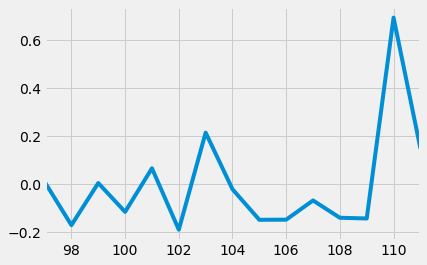

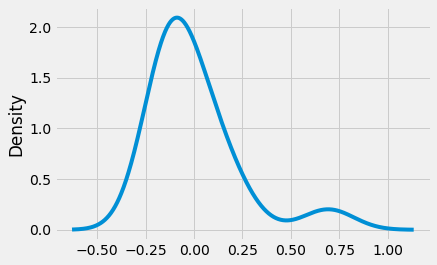

count    15.000000
mean     -0.000004
std       0.226787
min      -0.189099
25%      -0.144869
50%      -0.067420
75%       0.038470
max       0.693476
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



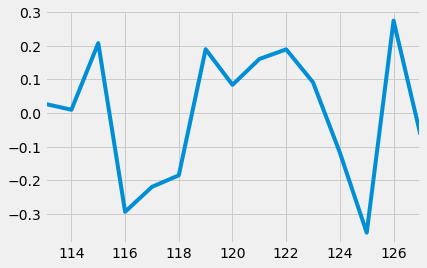

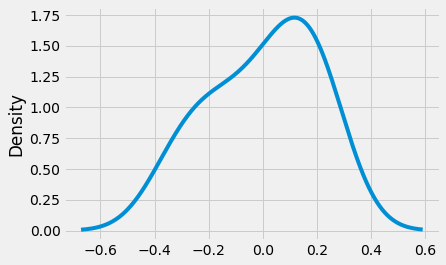

count    15.000000
mean     -0.000393
std       0.197576
min      -0.356332
25%      -0.151823
50%       0.027351
75%       0.174759
max       0.274622
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



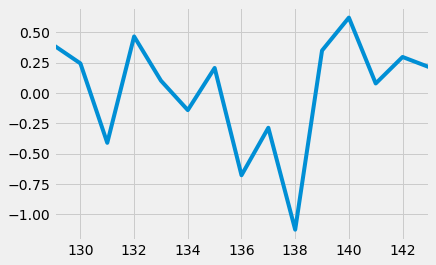

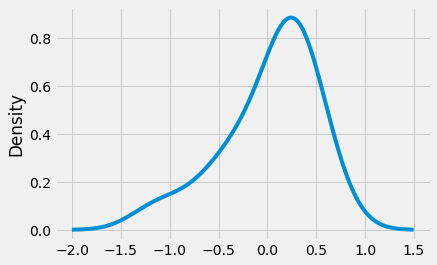

count    15.000000
mean      0.021411
std       0.472816
min      -1.127925
25%      -0.214482
50%       0.206028
75%       0.323143
max       0.621227
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



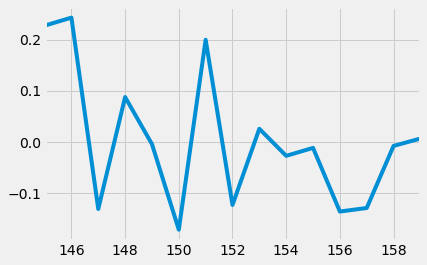

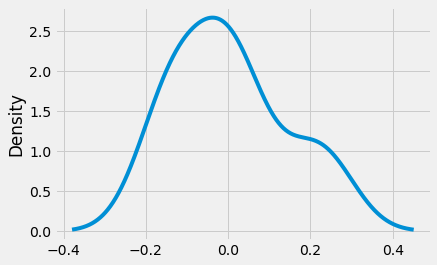

count    15.000000
mean      0.003125
std       0.135660
min      -0.171948
25%      -0.126469
50%      -0.007863
75%       0.056752
max       0.243326
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



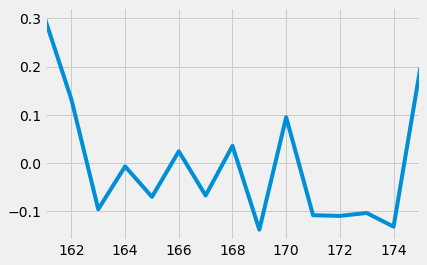

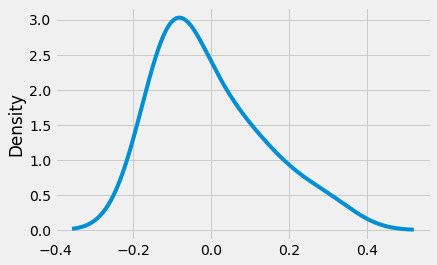

count    15.000000
mean     -0.002807
std       0.132821
min      -0.137760
25%      -0.105437
50%      -0.066935
75%       0.065382
max       0.301196
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



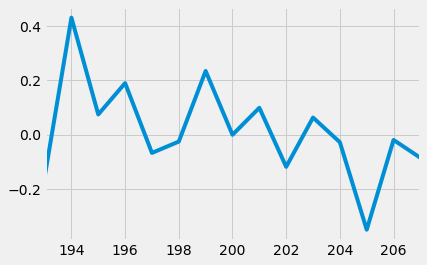

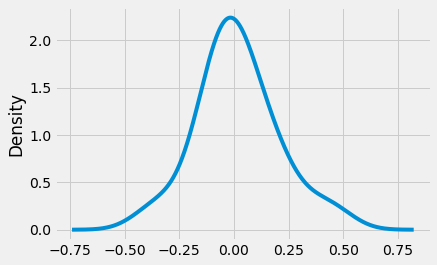

count    15.000000
mean      0.016298
std       0.182703
min      -0.349644
25%      -0.075915
50%      -0.019093
75%       0.087014
max       0.431302
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



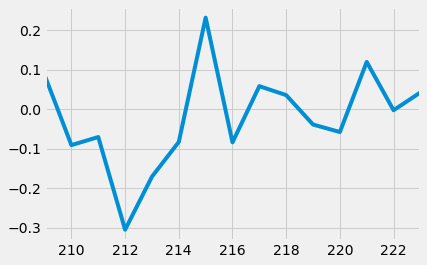

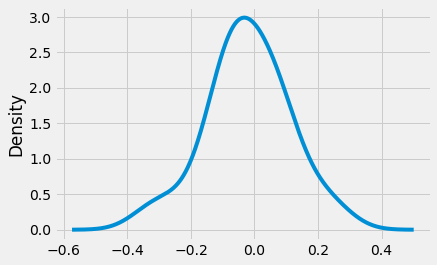

count    15.000000
mean     -0.021873
std       0.128111
min      -0.305456
25%      -0.083454
50%      -0.038828
75%       0.050521
max       0.232273
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



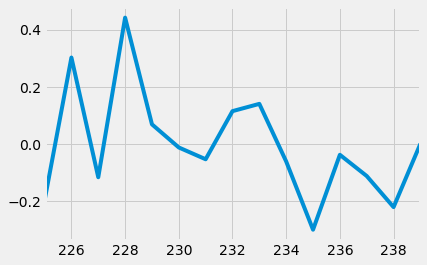

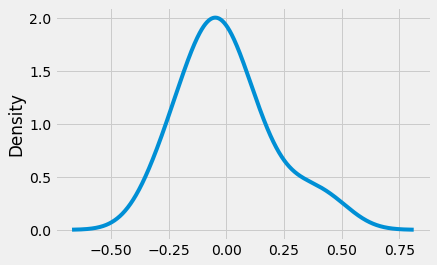

count    15.000000
mean     -0.002126
std       0.195381
min      -0.298579
25%      -0.113320
50%      -0.037034
75%       0.092335
max       0.441883
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



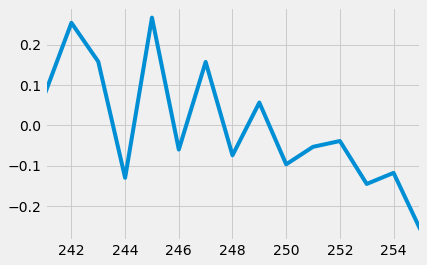

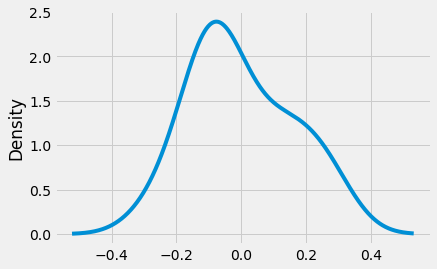

count    15.000000
mean     -0.000321
std       0.154973
min      -0.258623
25%      -0.107143
50%      -0.053180
75%       0.116694
max       0.267144
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



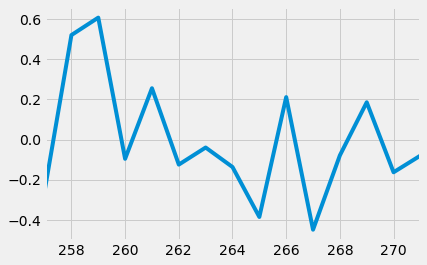

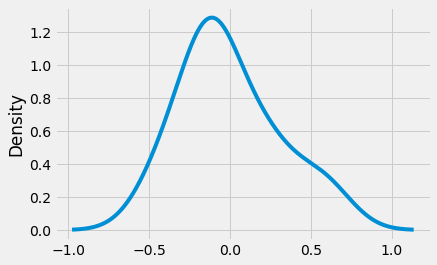

count    15.000000
mean     -0.001662
std       0.302959
min      -0.448616
25%      -0.149470
50%      -0.079515
75%       0.198907
max       0.607721
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



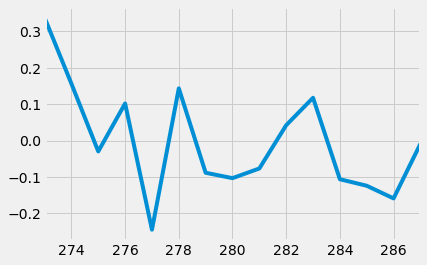

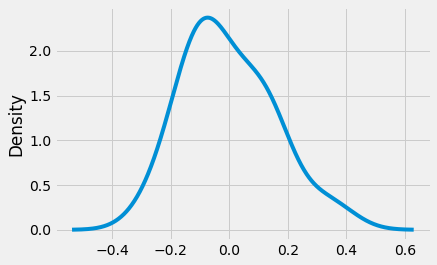

count    15.000000
mean     -0.002990
std       0.151940
min      -0.245432
25%      -0.105101
50%      -0.030018
75%       0.109712
max       0.338125
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



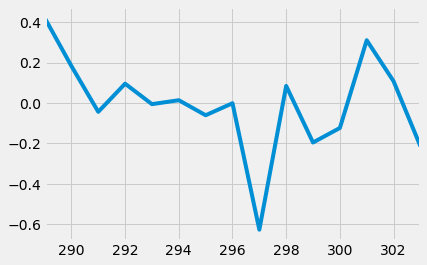

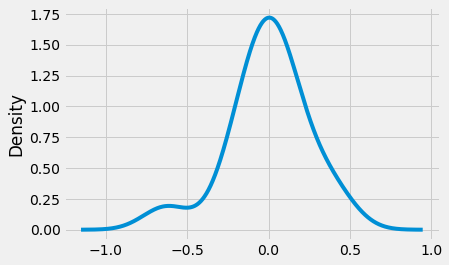

count    15.000000
mean     -0.003605
std       0.244038
min      -0.626791
25%      -0.092046
50%      -0.001165
75%       0.101642
max       0.422323
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



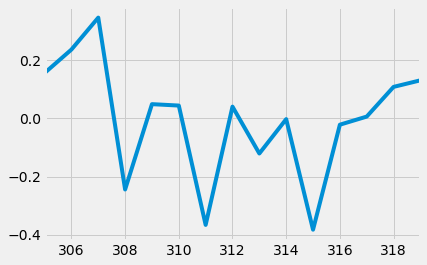

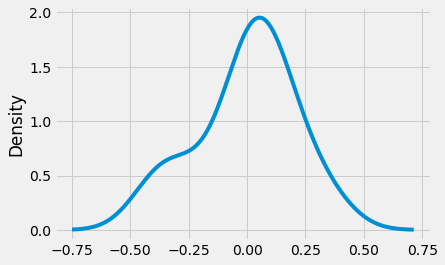

count    15.000000
mean     -0.000991
std       0.205859
min      -0.383170
25%      -0.070985
50%       0.040865
75%       0.120253
max       0.347592
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



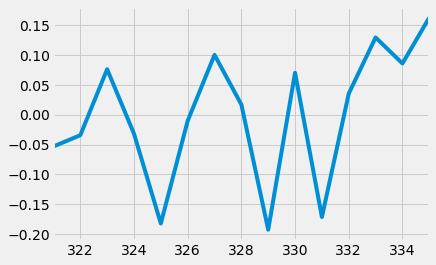

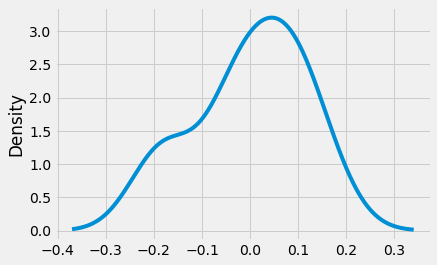

count    15.000000
mean      0.000056
std       0.112731
min      -0.192705
25%      -0.043797
50%       0.016969
75%       0.081053
max       0.162714
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



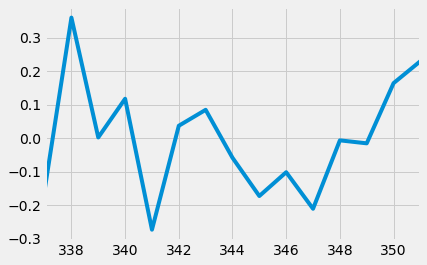

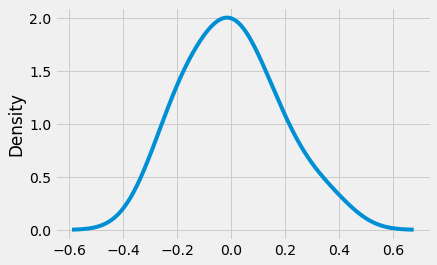

count    15.000000
mean     -0.000264
std       0.173078
min      -0.273610
25%      -0.129337
50%      -0.006800
75%       0.100853
max       0.359685
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



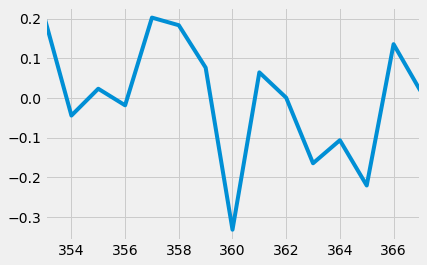

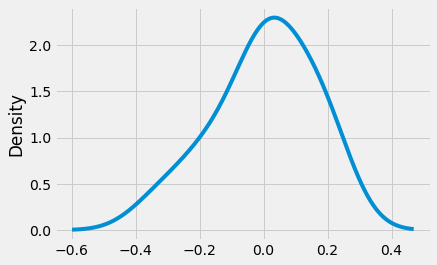

count    15.000000
mean      0.001177
std       0.156698
min      -0.331906
25%      -0.075486
50%       0.017969
75%       0.105787
max       0.202208
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



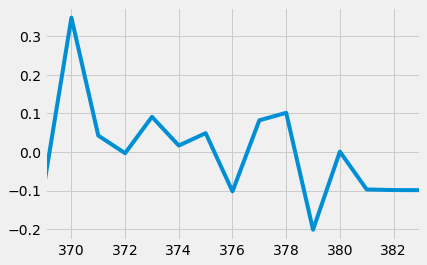

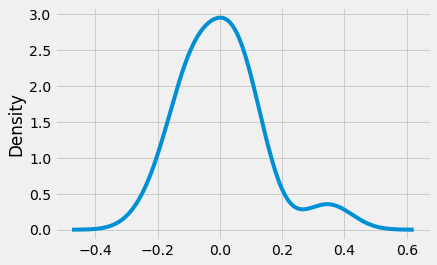

count    15.000000
mean      0.003848
std       0.129906
min      -0.200676
25%      -0.097393
50%       0.001239
75%       0.065741
max       0.348083
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



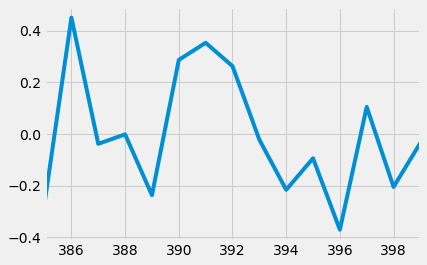

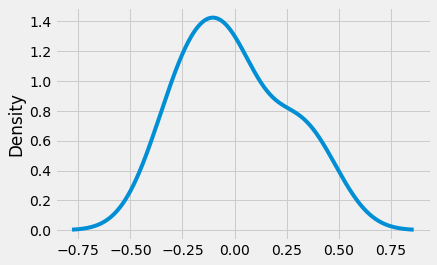

count    15.000000
mean     -0.002029
std       0.246966
min      -0.370173
25%      -0.210460
50%      -0.034078
75%       0.183386
max       0.449811
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



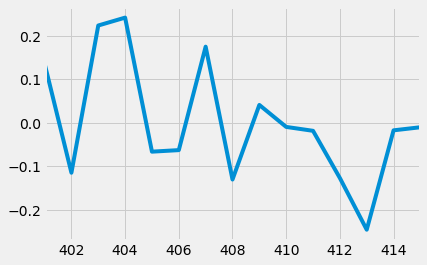

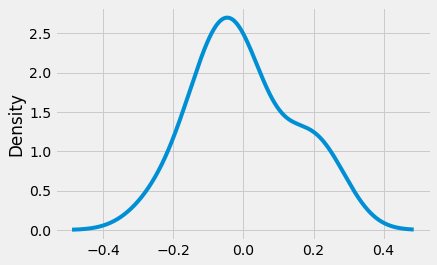

count    15.000000
mean      0.001404
std       0.140200
min      -0.245325
25%      -0.090179
50%      -0.016941
75%       0.089053
max       0.242135
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



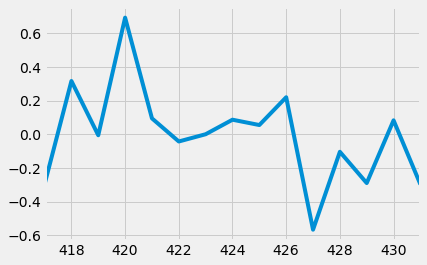

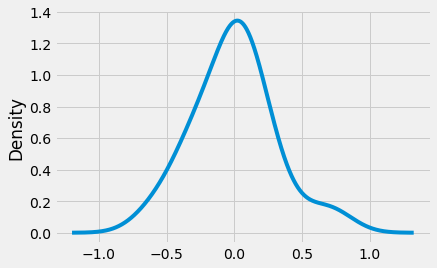

count    15.000000
mean     -0.004086
std       0.298848
min      -0.567368
25%      -0.197387
50%      -0.000060
75%       0.090191
max       0.692790
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



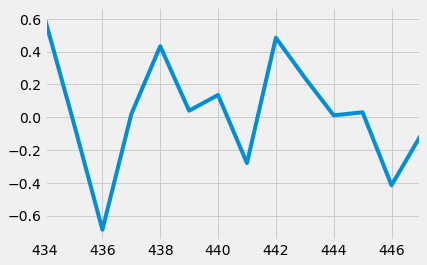

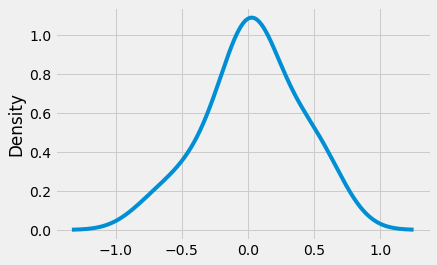

count    14.000000
mean      0.034599
std       0.349350
min      -0.684848
25%      -0.092475
50%       0.025133
75%       0.215212
max       0.607395
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



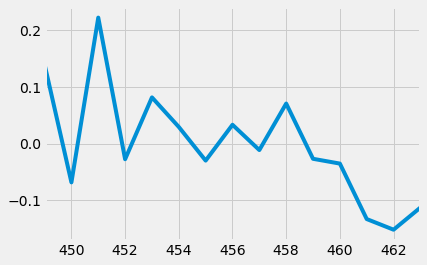

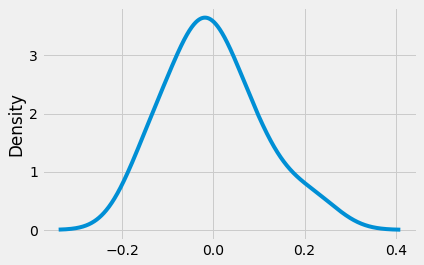

count    15.000000
mean     -0.001075
std       0.101651
min      -0.151711
25%      -0.051595
50%      -0.026539
75%       0.052255
max       0.222704
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



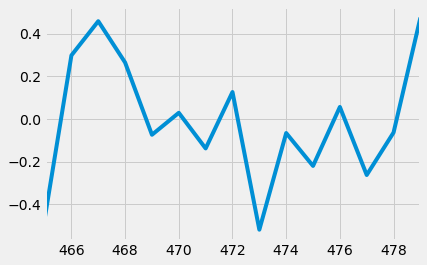

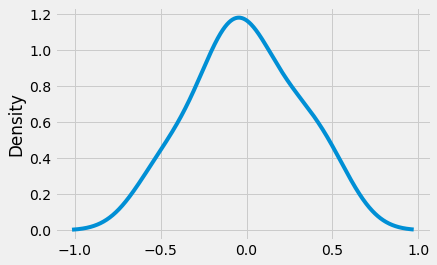

count    15.000000
mean     -0.006489
std       0.299462
min      -0.518489
25%      -0.178517
50%      -0.062833
75%       0.196063
max       0.475750
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



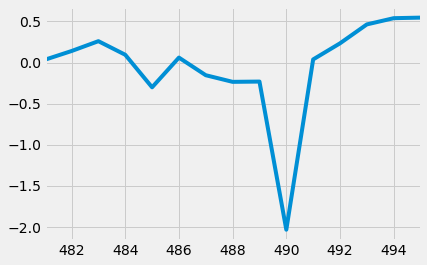

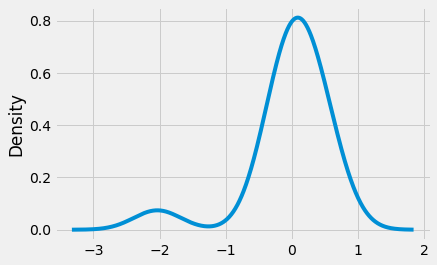

count    15.000000
mean     -0.035998
std       0.615672
min      -2.034297
25%      -0.192596
50%       0.060447
75%       0.247381
max       0.547164
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



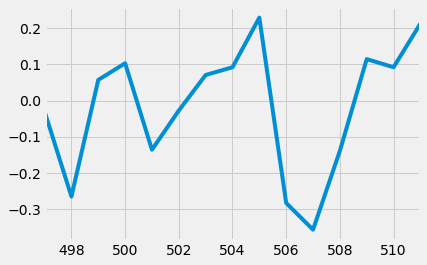

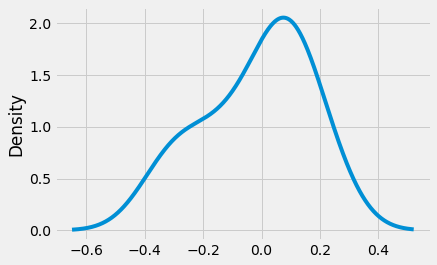

count    15.000000
mean     -0.017868
std       0.180865
min      -0.356540
25%      -0.137373
50%       0.056827
75%       0.097313
max       0.228743
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



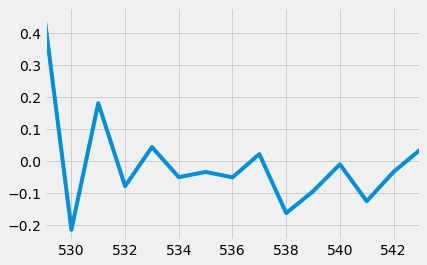

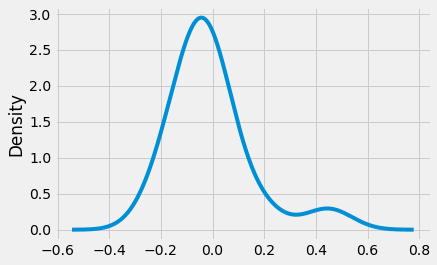

count    15.000000
mean     -0.007809
std       0.157065
min      -0.213499
25%      -0.085896
50%      -0.033355
75%       0.029309
max       0.447587
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



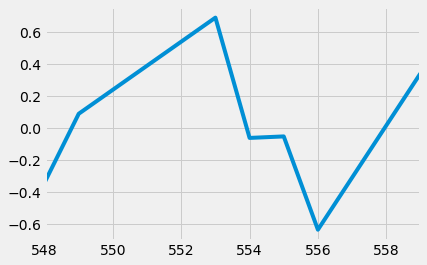

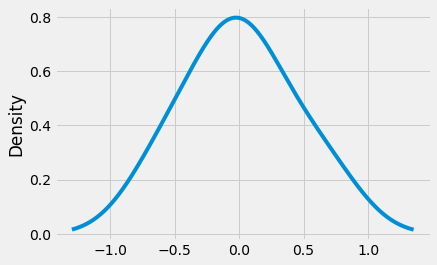

count    7.000000
mean     0.005194
std      0.432625
min     -0.633424
25%     -0.200039
50%     -0.051439
75%      0.215785
max      0.689733
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



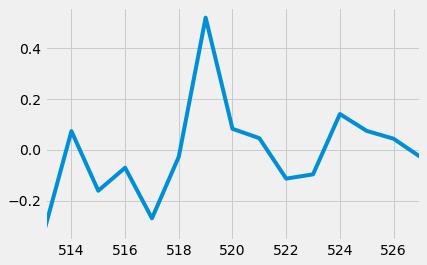

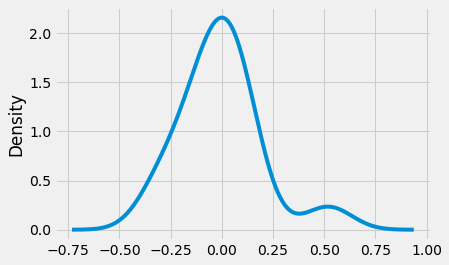

count    15.000000
mean     -0.006924
std       0.195841
min      -0.314468
25%      -0.105209
50%      -0.027270
75%       0.073624
max       0.519580
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



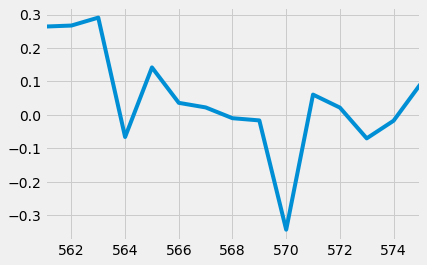

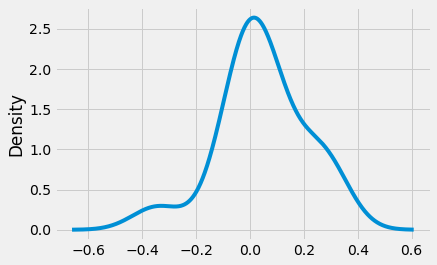

count    15.000000
mean      0.045037
std       0.159745
min      -0.342815
25%      -0.016783
50%       0.022520
75%       0.116926
max       0.290817
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



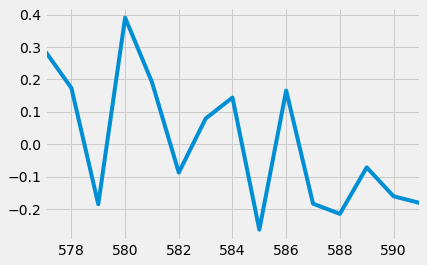

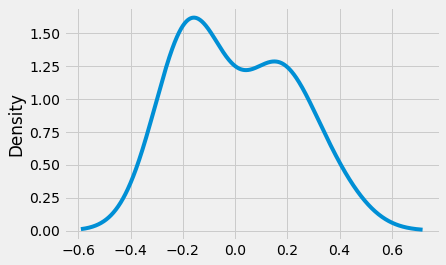

count    15.000000
mean      0.005728
std       0.209064
min      -0.263561
25%      -0.182503
50%      -0.071406
75%       0.169470
max       0.390413
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



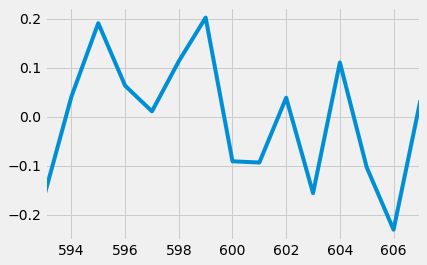

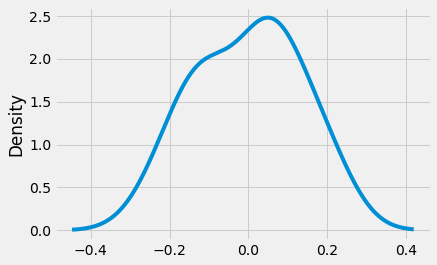

count    15.000000
mean     -0.001989
std       0.131266
min      -0.230552
25%      -0.098479
50%       0.033511
75%       0.086908
max       0.202076
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



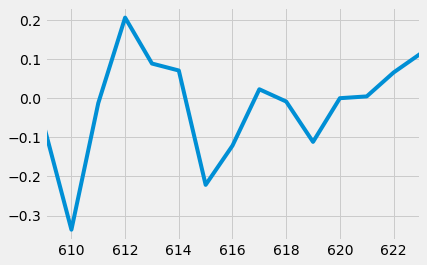

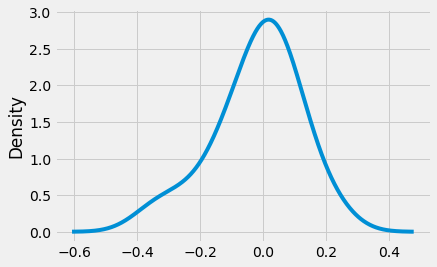

count    15.000000
mean     -0.020764
std       0.136866
min      -0.336162
25%      -0.093895
50%       0.000341
75%       0.068631
max       0.206525
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



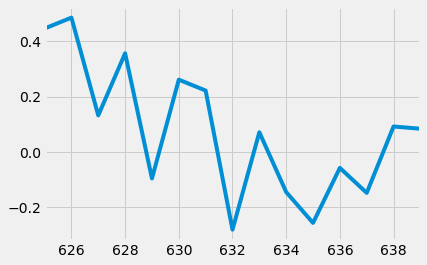

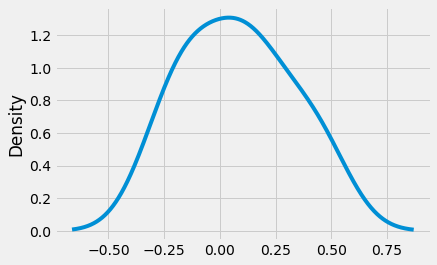

count    15.000000
mean      0.078302
std       0.242960
min      -0.280396
25%      -0.119885
50%       0.084423
75%       0.242070
max       0.485954
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



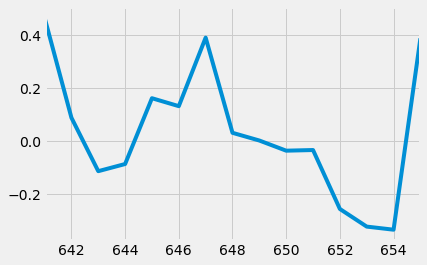

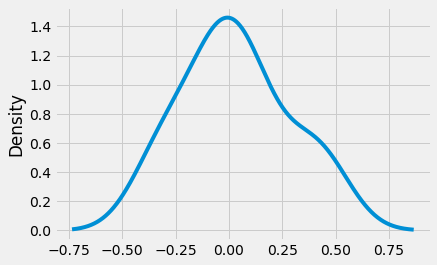

count    15.000000
mean      0.031213
std       0.248284
min      -0.335241
25%      -0.100680
50%       0.001572
75%       0.146368
max       0.465782
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



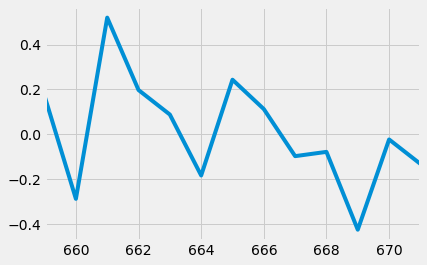

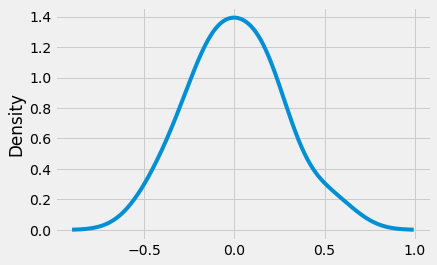

count    13.000000
mean      0.007933
std       0.249879
min      -0.425644
25%      -0.132250
50%      -0.023156
75%       0.170842
max       0.520275
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



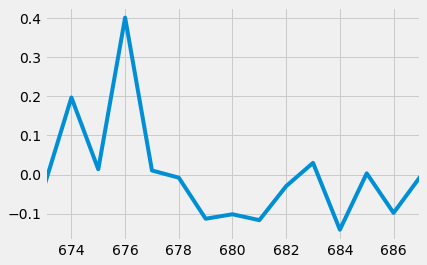

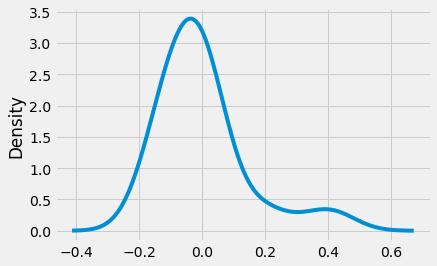

count    15.000000
mean      0.000928
std       0.138715
min      -0.141240
25%      -0.100002
50%      -0.008120
75%       0.011851
max       0.401530
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



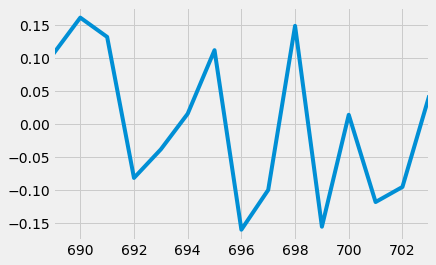

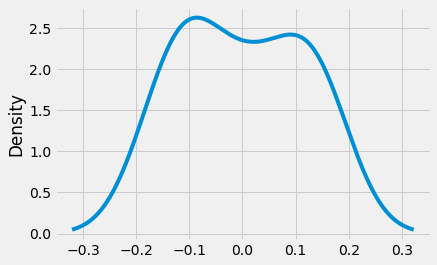

count    15.000000
mean     -0.000831
std       0.114253
min      -0.159910
25%      -0.097365
50%       0.014245
75%       0.109458
max       0.161470
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



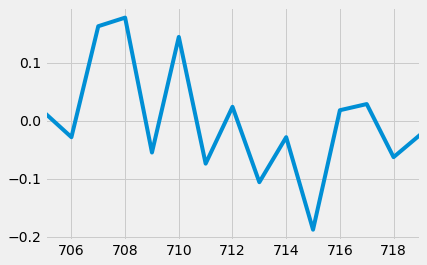

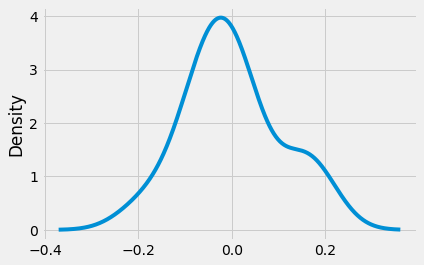

count    15.000000
mean      0.000063
std       0.100694
min      -0.187970
25%      -0.058979
50%      -0.024044
75%       0.026181
max       0.177489
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



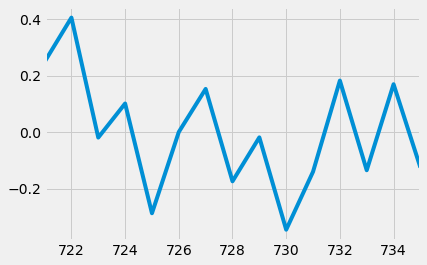

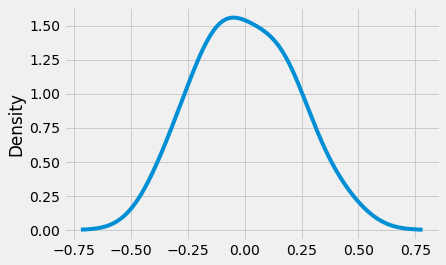

count    15.000000
mean      0.001275
std       0.208727
min      -0.345678
25%      -0.137532
50%      -0.018403
75%       0.161702
max       0.406145
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



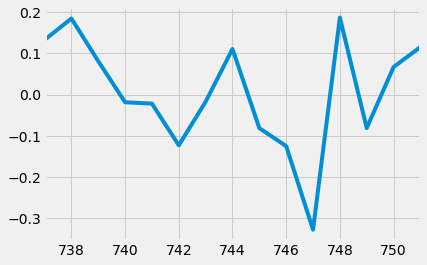

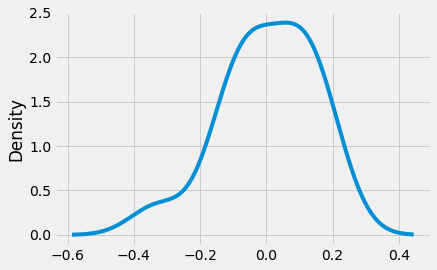

count    15.000000
mean      0.005367
std       0.140533
min      -0.328581
25%      -0.081566
50%      -0.017409
75%       0.113177
max       0.187051
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



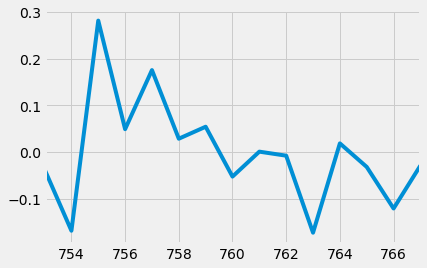

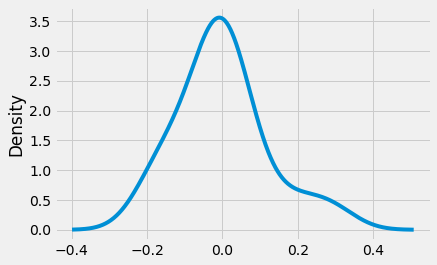

count    15.000000
mean     -0.000871
std       0.118072
min      -0.172674
25%      -0.044852
50%      -0.007815
75%       0.038695
max       0.281236
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



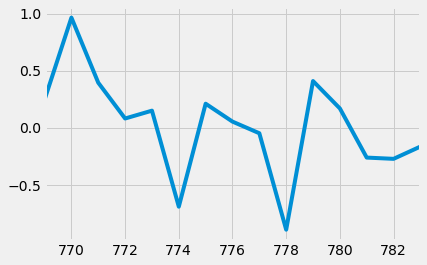

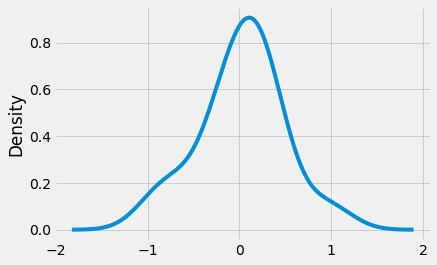

count    15.000000
mean      0.023474
std       0.452066
min      -0.893113
25%      -0.212913
50%       0.081340
75%       0.228772
max       0.965398
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



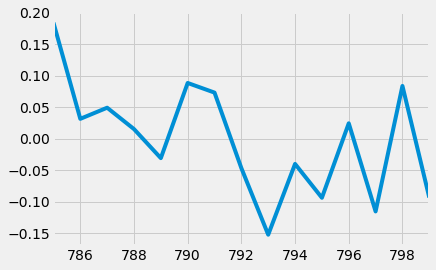

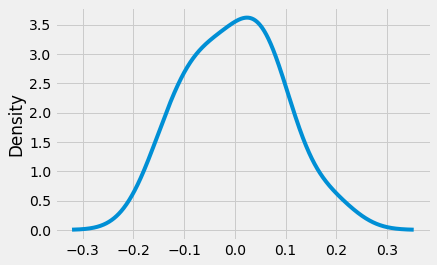

count    15.000000
mean     -0.001780
std       0.091452
min      -0.152620
25%      -0.070297
50%       0.014992
75%       0.060884
max       0.183922
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



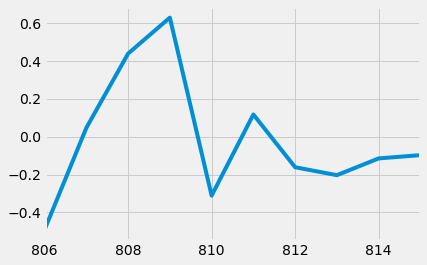

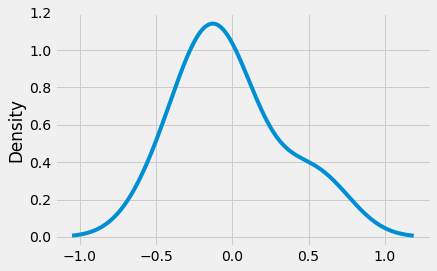

count    10.000000
mean     -0.014957
std       0.338295
min      -0.491466
25%      -0.192959
50%      -0.106258
75%       0.099414
max       0.628737
dtype: float64


In [152]:
plot_1(new_list)

In [163]:
type(new_list[0])

pandas.core.frame.DataFrame

## Predicting forescating using 

In [120]:
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [121]:
new_list[0]

Year    Deaths
Year                           
2000-01-01 2000-01-01  0.165080
2001-01-01 2001-01-01  0.376051
2002-01-01 2002-01-01  0.112795
2003-01-01 2003-01-01 -0.328504
2004-01-01 2004-01-01  0.532805
2005-01-01 2005-01-01 -0.102948
2006-01-01 2006-01-01  0.478999
2007-01-01 2007-01-01  0.249655
2008-01-01 2008-01-01  0.125505
2009-01-01 2009-01-01  0.074108
2010-01-01 2010-01-01 -0.079249
2011-01-01 2011-01-01 -0.074901
2012-01-01 2012-01-01 -0.028171
2013-01-01 2013-01-01  0.000000
2014-01-01 2014-01-01  0.477121

In [124]:
# make a list of df with columns as 'ds' and 'y'
new =[]
for i in new_list:
    df_prophet = i.rename(columns = {'Year': 'ds', 'Deaths': 'y'})
#     print(df_prophet)# can try with ts_log_diff
    new.append(df_prophet)


In [126]:
new[0]

ds         y
Year                           
2000-01-01 2000-01-01  0.165080
2001-01-01 2001-01-01  0.376051
2002-01-01 2002-01-01  0.112795
2003-01-01 2003-01-01 -0.328504
2004-01-01 2004-01-01  0.532805
2005-01-01 2005-01-01 -0.102948
2006-01-01 2006-01-01  0.478999
2007-01-01 2007-01-01  0.249655
2008-01-01 2008-01-01  0.125505
2009-01-01 2009-01-01  0.074108
2010-01-01 2010-01-01 -0.079249
2011-01-01 2011-01-01 -0.074901
2012-01-01 2012-01-01 -0.028171
2013-01-01 2013-01-01  0.000000
2014-01-01 2014-01-01  0.477121

In [127]:
my_model = Prophet(interval_width=0.95)
print(my_model.history)



None


In [134]:
for i in new:
    my_model.fit(new[i])


TypeError: list indices must be integers or slices, not DataFrame

In [130]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

ds
46 2016-09-01
47 2016-10-01
48 2016-11-01
49 2016-12-01
50 2017-01-01

In [131]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
46 2016-09-01 -0.076761   -0.540085    0.371314
47 2016-10-01 -0.065684   -0.533682    0.397794
48 2016-11-01 -0.072122   -0.540022    0.339187
49 2016-12-01 -0.158702   -0.616233    0.312083
50 2017-01-01  0.071212   -0.412661    0.524817

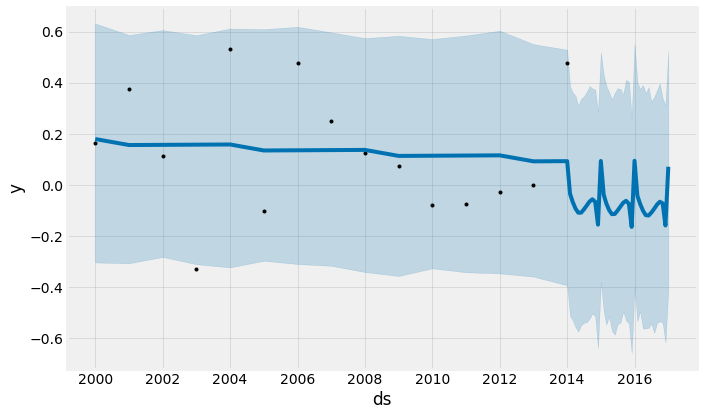

In [136]:
model_1 = my_model.plot(forecast,uncertainty=True)

In [139]:
model2=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2) 
# model2.add_seasonality(name=’monthly’, period=30.5, fourier_order=5, prior_scale=0.02)

TypeError: 'NoneType' object is not subscriptable

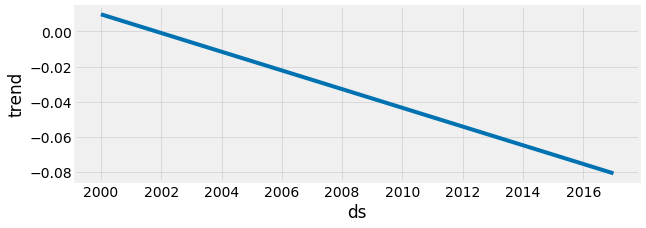

In [142]:
model2.plot_components(forecast)

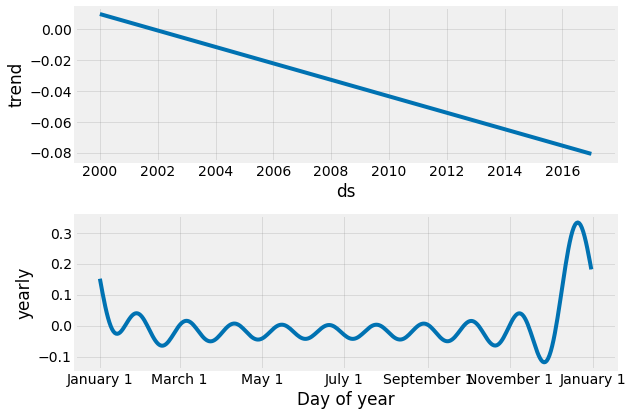

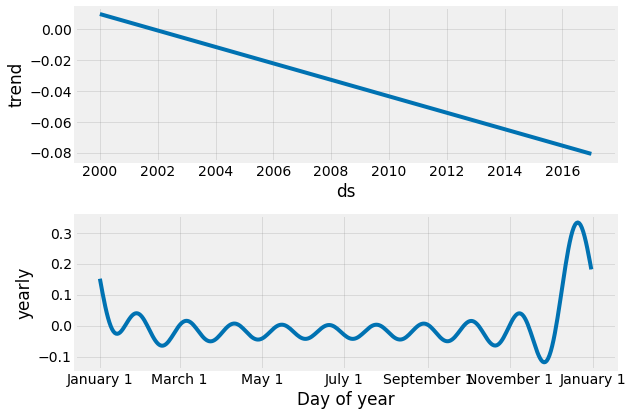

In [133]:
my_model.plot_components(forecast)
